## EDA

### **1. Data Overview**

#### 1.1 Data Load

In [20]:
import pandas as pd
import openpyxl
import os
import re

# Load the workbook
file_path = '1_finalized_datasets.xlsx'
workbook = openpyxl.load_workbook(file_path)

dataframes={}
# Loop through all sheet names
for sheet in workbook.sheetnames:
    
    print(f"Processing sheet: {sheet}")
    clean_name = re.sub(r'[^\w\s]', '', sheet).strip()
    clean_name = clean_name.replace(" ", "_")  # Optional: Replace spaces with underscores
    if clean_name in dataframes:
        print(f"⚠️ Skipping duplicate sheet name: {clean_name}")
        continue
    # Read the sheet into a DataFrame
    df = pd.read_excel(file_path, sheet_name=sheet)

    # Create a variable with the cleaned sheet name
    dataframes[clean_name] = df

    print(f"✅ Created DataFrame: {clean_name} ({df.shape[0]} rows)")


Processing sheet: Sheet1
✅ Created DataFrame: Sheet1 (1322 rows)
Processing sheet: Sheet2
✅ Created DataFrame: Sheet2 (1336 rows)
Processing sheet: category
✅ Created DataFrame: category (11 rows)
Processing sheet: allergen
✅ Created DataFrame: allergen (8 rows)
Processing sheet: countrymap 
✅ Created DataFrame: countrymap (76 rows)
Processing sheet: 📝 recipe_ingredient
✅ Created DataFrame: recipe_ingredient (8209 rows)
Processing sheet: 🏷️ recipe_category_df
✅ Created DataFrame: recipe_category_df (8123 rows)
Processing sheet: 🍴 recipes
✅ Created DataFrame: recipes (1322 rows)
Processing sheet: 📊 recipe_nutrition
✅ Created DataFrame: recipe_nutrition (1322 rows)
Processing sheet: 🧂 final_ingredient_df
✅ Created DataFrame: final_ingredient_df (999 rows)


#### 1.2 Data Summary

In [21]:
# Sheets to exclude
excluded_sheets = ['Sheet1', 'Sheet2']

print(f"\n🔍 Starting Analysis of DataFrames...")

# Loop through all dataframes in the dictionary
for name, df in dataframes.items():
    if name not in excluded_sheets:
        print(f"\n🔍 Analyzing Sheet: {name}")
        print("=" * 60)

        # 1. Shape
        print(f"📐 Shape: {df.shape}")

        # 2. Columns
        print(f"🧾 Columns: {list(df.columns)}")

        # 3. Info
        print(f"\n🛠️ DataFrame Info:")
        df.info()

        # 4. Total null values
        total_null = df.isnull().sum().sum()
        print(f"\n🚫 Total Null Values (overall): {total_null}")

        # 4.1 Missing values per column
        missing_per_column = df.isnull().sum()
        if missing_per_column.any():
            print("\n🚨 Missing Values Per Column:")
            print(missing_per_column[missing_per_column > 0].sort_values(ascending=False))
            
            percent_missing = (missing_per_column / len(df)) * 100
            print("\n📈 Missing Values (% per column):")
            print(percent_missing[percent_missing > 0].sort_values(ascending=False))
        else:
            print("\n✅ No missing values in any column.")

        # 5. Unique values per column
        print(f"\n🔢 Unique Values per Column:")
        print(df.nunique(dropna=False))

        # 6. Sample rows
        print(f"\n🔍 Sample Rows (first 5):")
        try:
            from IPython.display import display
            display(df.head(5))
        except ImportError:
            print(df.head(5))



🔍 Starting Analysis of DataFrames...

🔍 Analyzing Sheet: category
📐 Shape: (11, 3)
🧾 Columns: ['pk', 'name', 'description']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pk           11 non-null     int64 
 1   name         11 non-null     object
 2   description  11 non-null     object
dtypes: int64(1), object(2)
memory usage: 392.0+ bytes

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
pk             11
name           11
description    11
dtype: int64

🔍 Sample Rows (first 5):


,pk,name,description
0,1,vegan,Allowed categories: plant_based\nExcluded alle...
1,2,vegetarian,"Allowed categories: plant_based, dairy, egg\nE..."
2,3,pescetarian,"Allowed categories: plant_based, dairy, egg, s..."
3,4,dairy free,Excluded allergen groups: milk\nExcluded ingre...
4,5,egg free,Excluded allergen groups: egg\nExcluded ingred...



🔍 Analyzing Sheet: allergen
📐 Shape: (8, 3)
🧾 Columns: ['pk', 'name', 'description']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pk           8 non-null      int64 
 1   name         8 non-null      object
 2   description  8 non-null      object
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
pk             8
name           8
description    8
dtype: int64

🔍 Sample Rows (first 5):


,pk,name,description
0,1,dairy,Common infant allergen. Found in dairy products.
1,2,egg,Can cause allergy even in small amounts.
2,3,soy,"Plant-based but common allergen, especially in..."
3,4,tree_nuts,Tree nuts are a top allergen. Avoid early intr...
4,5,peanuts,Peanuts are a major allergen. Introduce carefu...



🔍 Analyzing Sheet: countrymap
📐 Shape: (76, 4)
🧾 Columns: ['pk', 'country', 'region', 'flag_code']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pk         76 non-null     int64 
 1   country    76 non-null     object
 2   region     76 non-null     object
 3   flag_code  76 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.5+ KB

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
pk           76
country      74
region       11
flag_code    74
dtype: int64

🔍 Sample Rows (first 5):


,pk,country,region,flag_code
0,1,China,Asian,cn
1,2,Japan,Asian,jp
2,3,South Korea,Asian,kr
3,4,Mongolia,Asian,mn
4,5,Nepal,Asian,np



🔍 Analyzing Sheet: recipe_ingredient
📐 Shape: (8209, 2)
🧾 Columns: ['recipe_id', 'ingredient_id']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8209 entries, 0 to 8208
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   recipe_id      8209 non-null   int64
 1   ingredient_id  8209 non-null   int64
dtypes: int64(2)
memory usage: 128.4 KB

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
recipe_id        1322
ingredient_id     999
dtype: int64

🔍 Sample Rows (first 5):


,recipe_id,ingredient_id
0,1,155
1,1,332
2,1,182
3,1,232
4,1,185



🔍 Analyzing Sheet: recipe_category_df
📐 Shape: (8123, 2)
🧾 Columns: ['recipe_id', 'category_id']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   recipe_id    8123 non-null   int64
 1   category_id  8123 non-null   int64
dtypes: int64(2)
memory usage: 127.0 KB

🚫 Total Null Values (overall): 0

✅ No missing values in any column.

🔢 Unique Values per Column:
recipe_id      1322
category_id      10
dtype: int64

🔍 Sample Rows (first 5):


,recipe_id,category_id
0,1,11
1,1,9
2,1,4
3,1,5
4,1,6



🔍 Analyzing Sheet: recipes
📐 Shape: (1322, 20)
🧾 Columns: ['name', 'ingredients', 'instructions', 'min_age', 'max_age', 'texture', 'prep_time', 'cook_time', 'serving', 'recipe_link', 'credibility', 'image_link', 'difficulty', 'meal_type', 'description', 'tips', 'hypoallergenic', 'origin_id', 'choking_hazards', 'recipe_id']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1322 non-null   object 
 1   ingredients      1322 non-null   object 
 2   instructions     1322 non-null   object 
 3   min_age          1205 non-null   float64
 4   max_age          1175 non-null   float64
 5   texture          1322 non-null   object 
 6   prep_time        739 non-null    float64
 7   cook_time        750 non-null    float64
 8   serving          1176 non-null   object 
 9   recipe_link      1322 non-null   obj

,name,ingredients,instructions,min_age,max_age,texture,prep_time,cook_time,serving,recipe_link,credibility,image_link,difficulty,meal_type,description,tips,hypoallergenic,origin_id,choking_hazards,recipe_id
0,Cassava Porridge with Fish Sauce and Lemon (Bu...,"- 60 g cassava, boiled and blended\n- 20 g fis...","Broth:\n1. Use chicken bones, chicken feet, fi...",6.0,8.0,NONE,15.0,45.0,1,https://eprints.uad.ac.id/51598/1/Buku%20Makan...,NaN,NaN,Medium,NaN,NaN,NaN,No,9,No,1
1,Bitterballs (Bitterballen),- 100 g beef mince \n- 30 g potato starch \n- ...,1. Stir-fry blended spices until fragrant. \n2...,9.0,11.0,family food,30.0,30.0,10 servings,pdfcoffee.com_mommyclopedia-78-resep-mpasi-pdf...,NaN,NaN,Hard,Snack,NaN,NaN,No,9,No,2
2,Broccoli/Cauliflower Cheese,"- 175g cauliflower/broccoli, cut into pieces\n...","1. Steam, boil, or microwave cauliflower/brocc...",6.0,12.0,NONE,10.0,20.0,NaN,https://www.islhd.health.nsw.gov.au/sites/defa...,Illawarra Shoalhaven Local Health District (IS...,NaN,Medium,NaN,NaN,NaN,No,68,No,3
3,Vegetable Fingers,"- 1 carrot, potato, or sweet potato, peeled an...",1. Steam or microwave vegetables until tender....,6.0,12.0,NONE,5.0,10.0,NaN,https://www.islhd.health.nsw.gov.au/sites/defa...,Illawarra Shoalhaven Local Health District (IS...,NaN,Easy,NaN,NaN,NaN,Yes,68,No,4
4,Beef Casserole,"- 1 onion, peeled and finely chopped\n- 1½ tab...",1. Preheat oven to 180°C.\n2. Heat oil in a me...,6.0,12.0,family food,10.0,2.0,NaN,https://www.islhd.health.nsw.gov.au/sites/defa...,Illawarra Shoalhaven Local Health District (IS...,NaN,Medium,NaN,NaN,NaN,Yes,68,No,5



🔍 Analyzing Sheet: recipe_nutrition
📐 Shape: (1322, 8)
🧾 Columns: ['recipe_id', 'total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g', 'final_micronutrients', 'nutrition_id', 'fat']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recipe_id             1322 non-null   int64  
 1   total_energy_kcal     1317 non-null   object 
 2   total_carbs_g         1320 non-null   object 
 3   total_protein_g       1321 non-null   object 
 4   total_fat_g           1283 non-null   object 
 5   final_micronutrients  985 non-null    object 
 6   nutrition_id          1322 non-null   int64  
 7   fat                   38 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 82.8+ KB

🚫 Total Null Values (overall): 1668

🚨 Missing Values Per Column:
fat                     1284
final

,recipe_id,total_energy_kcal,total_carbs_g,total_protein_g,total_fat_g,final_micronutrients,nutrition_id,fat
0,1,255.48,24.854,24.965,13.1378,"['Magnesium', 'P', 'beta', 'Total fat (NLEA)',...",1,NaN
1,2,0,3.376,68.751,50.332,"['Sodium', 'Na']",2,NaN
2,3,53.55,23.5955,46.383,28.989,"['P', 'Vitamin A', 'Vitamin K (phylloquinone)'...",3,NaN
3,5,1585.2,44.9207,113.015,290.2725,"['Sodium', 'P', 'Vitamin C', 'Cholesterol', 'C...",4,NaN
4,6,0,0.492,0.0943,0.0359,"['Ca', 'Na', 'K', 'Sodium', 'Potassium', 'Calc...",5,NaN



🔍 Analyzing Sheet: final_ingredient_df
📐 Shape: (999, 4)
🧾 Columns: ['pk', 'name', 'allergen_group_id', 'isAllergen']

🛠️ DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pk                 999 non-null    int64  
 1   name               999 non-null    object 
 2   allergen_group_id  238 non-null    float64
 3   isAllergen         999 non-null    bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 24.5+ KB

🚫 Total Null Values (overall): 761

🚨 Missing Values Per Column:
allergen_group_id    761
dtype: int64

📈 Missing Values (% per column):
allergen_group_id    76.176176
dtype: float64

🔢 Unique Values per Column:
pk                   999
name                 999
allergen_group_id      9
isAllergen             2
dtype: int64

🔍 Sample Rows (first 5):


,pk,name,allergen_group_id,isAllergen
0,1,acai,NaN,False
1,2,agar-agar powder,NaN,False
2,3,all purpose flour,8.0,True
3,4,almond,NaN,False
4,5,almond butter,4.0,True


In [22]:
def detect_missing_values(df):
    total_missing = df.isnull().sum().sum()
    print(f"\n🚫 TOTAL Missing Values: {total_missing}")

    missing_per_column = df.isnull().sum()
    if missing_per_column.any():
        print("\n📊 Missing Values Per Column:")
        print(missing_per_column[missing_per_column > 0].sort_values(ascending=False))

        print("\n📈 Missing Values Percentage Per Column:")
        percent_missing = (missing_per_column / len(df)) * 100
        print(percent_missing[percent_missing > 0].sort_values(ascending=False))
    else:
        print("✅ No missing values in any column.")


In [23]:
excluded_sheets = ['Sheet1', 'Sheet2']

for name, df in dataframes.items():
    if name not in excluded_sheets:
        print(f"\n🔍 Analyzing Sheet: {name}")
        print("=" * 60)
        detect_missing_values(df)



🔍 Analyzing Sheet: category

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: allergen

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: countrymap

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: recipe_ingredient

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: recipe_category_df

🚫 TOTAL Missing Values: 0
✅ No missing values in any column.

🔍 Analyzing Sheet: recipes

🚫 TOTAL Missing Values: 7101

📊 Missing Values Per Column:
tips           1298
image_link     1279
description    1190
meal_type       985
credibility     784
prep_time       583
cook_time       572
max_age         147
serving         146
min_age         117
dtype: int64

📈 Missing Values Percentage Per Column:
tips           98.184569
image_link     96.747352
description    90.015129
meal_type      74.508321
credibility    59.304085
prep_time      44.099849
cook_time      43.267776
max_age

### **2. Univariate Analysis**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  


#### 2.1 DataFrame: category

In [12]:
df = dataframes['category']
print(f"All unique values in 'category' column: {df['pk'].is_unique}, All unique name :{df['name'].is_unique}")
print(df.head(3))  # show a few rows for documentation

All unique values in 'category' column: True, All unique name :True
   pk         name                                        description  \
0   1        vegan  Allowed categories: plant_based\nExcluded alle...   
1   2   vegetarian  Allowed categories: plant_based, dairy, egg\nE...   
2   3  pescetarian  Allowed categories: plant_based, dairy, egg, s...   

   name_length  desc_char_count  desc_word_count  
0            5              281               34  
1           10              276               35  
2           11              165               20  


Primary Key (pk) Analysis:
Total records: 11
Missing values: 0
Min ID: 1
Max ID: 11
ID Range: 10
ID Spacing Analysis:
pk
1.0    10
Name: count, dtype: int64


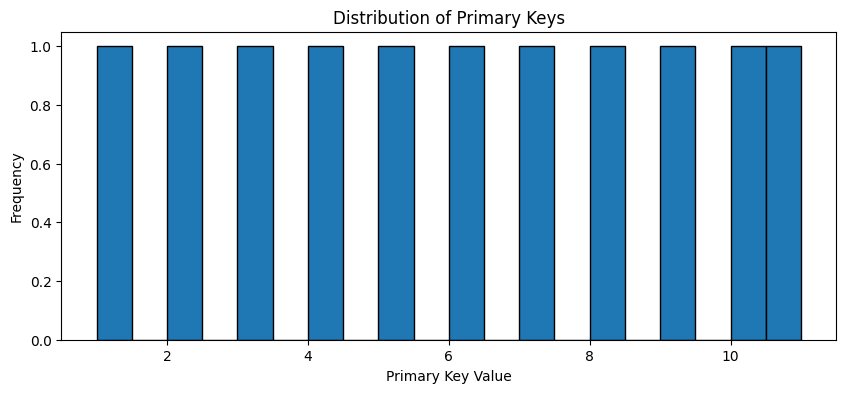

count    11.000000
mean      6.000000
std       3.316625
min       1.000000
25%       3.500000
50%       6.000000
75%       8.500000
max      11.000000
Name: pk, dtype: float64

In [13]:
# 1. Primary Key (pk) Analysis
print("="*50)
print("Primary Key (pk) Analysis:")
print("="*50)
print(f"Total records: {len(df)}")
print(f"Missing values: {df['pk'].isnull().sum()}")
print(f"Min ID: {df['pk'].min()}")
print(f"Max ID: {df['pk'].max()}")
print(f"ID Range: {df['pk'].max() - df['pk'].min()}")
print(f"ID Spacing Analysis:\n{df['pk'].diff().value_counts().head()}")

# Visualize ID distribution
plt.figure(figsize=(10, 4))
df['pk'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Primary Keys')
plt.xlabel('Primary Key Value')
plt.ylabel('Frequency')
plt.show()

display(df['pk'].describe())


In [14]:
# 2. Category Name Analysis
print("\n" + "="*50)
print("Category Name Analysis:")
print("="*50)
print(f"Missing values: {df['name'].isnull().sum()}")
print(f"Unique count: {df['name'].nunique()}/{len(df)}")

# Name length analysis
df['name_length'] = df['name'].str.len()
print("\nName Length Statistics:")
print(df['name_length'].describe())

print("\nCount Statistics:")
# Frequency count of categories in 'name' column
category_counts = df['name'].value_counts()
print(category_counts)


Category Name Analysis:
Missing values: 0
Unique count: 11/11

Name Length Statistics:
count    11.000000
mean      8.363636
std       2.110579
min       5.000000
25%       7.500000
50%       8.000000
75%      10.000000
max      11.000000
Name: name_length, dtype: float64

Count Statistics:
name
vegan          1
vegetarian     1
pescetarian    1
dairy free     1
egg free       1
soy free       1
nut free       1
gluten free    1
halal          1
non halal      1
non veg        1
Name: count, dtype: int64


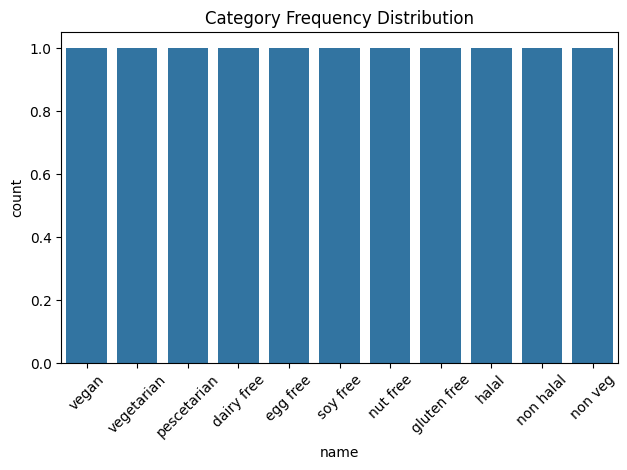

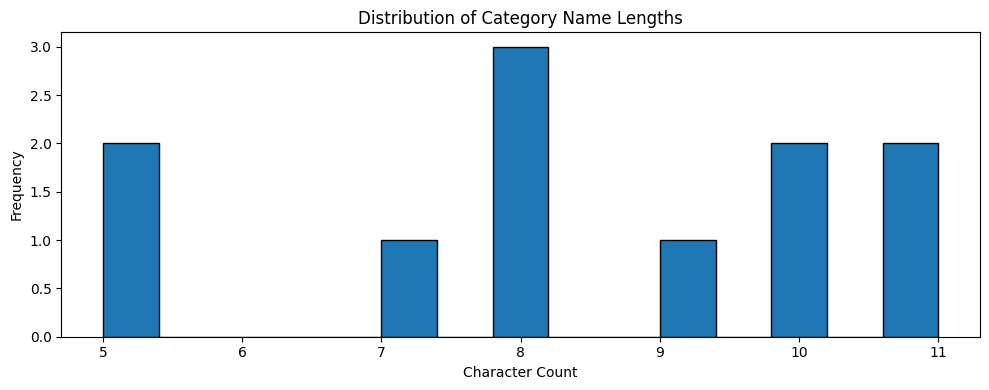

In [15]:
sns.countplot(x='name', data=df)
plt.title('Category Frequency Distribution')
plt.xticks(rotation=45)
plt.tight_layout()  # Moved here
plt.show()

# Visualize name lengths
plt.figure(figsize=(10, 4))
df['name_length'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Distribution of Category Name Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.tight_layout()  # Also here
plt.show()

In [16]:
# 3. Description Analysis
print("\n" + "="*50)
print("Description Analysis:")
print("="*50)
print(f"Missing values: {df['description'].isnull().sum()}")

# Text length metrics
df['desc_char_count'] = df['description'].str.len()
df['desc_word_count'] = df['description'].str.split().str.len()

print("\nCharacter Count Statistics:")
print(df['desc_char_count'].describe())

print("\nWord Count Statistics:")
print(df['desc_word_count'].describe())

# Content pattern analysis
print("\nKey phrase presence:")
key_phrases = ['Allowed categories', 'Excluded allergens', 'plant_based', 'dairy', 'egg']
for phrase in key_phrases:
    count = df['description'].str.contains(phrase).sum()
    print(f"{phrase}: {count}/{len(df)} ({count/len(df):.1%})")


# # Check the length of each description
# df['description_length'] = df['description'].apply(len)
# print("\nDescription Length Statistics:")
# print(df['description_length'].describe())


Description Analysis:
Missing values: 0

Character Count Statistics:
count     11.000000
mean     155.363636
std       67.733703
min       74.000000
25%      110.000000
50%      140.000000
75%      169.500000
max      281.000000
Name: desc_char_count, dtype: float64

Word Count Statistics:
count    11.000000
mean     19.363636
std       8.115081
min      12.000000
25%      14.000000
50%      17.000000
75%      21.000000
max      35.000000
Name: desc_word_count, dtype: float64

Key phrase presence:
Allowed categories: 3/11 (27.3%)
Excluded allergens: 0/11 (0.0%)
plant_based: 3/11 (27.3%)
dairy: 2/11 (18.2%)
egg: 4/11 (36.4%)


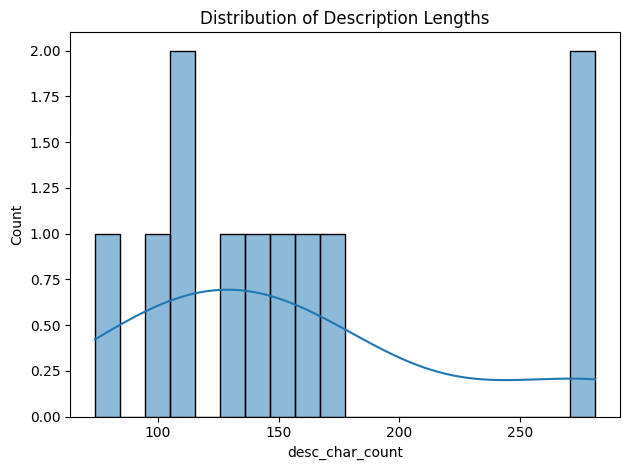

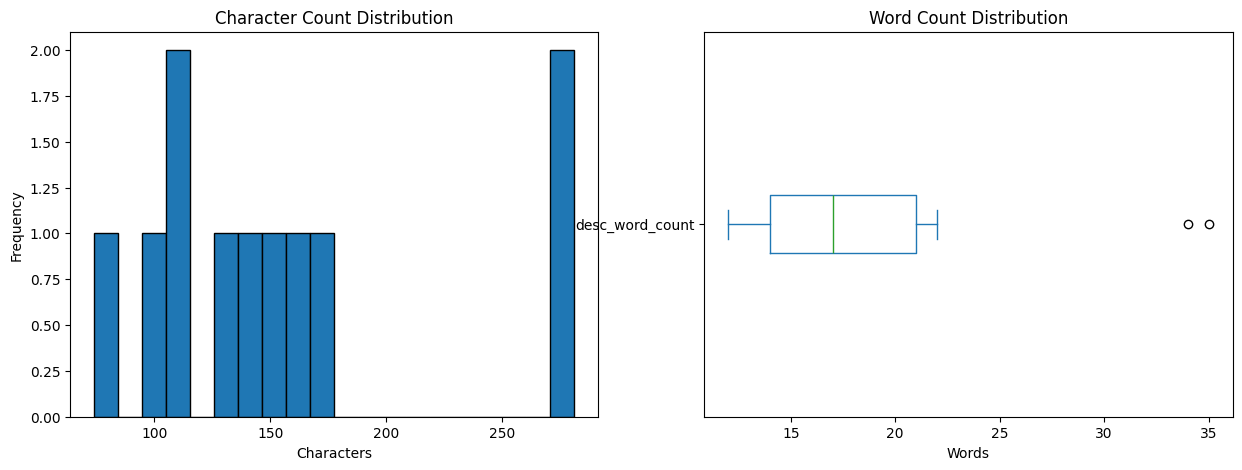

NameError: name 'all_text' is not defined

In [17]:
# Generating a word cloud for the descriptions
from wordcloud import WordCloud
# Plotting the length distribution of the descriptions
sns.histplot(df['desc_char_count'], bins=20, kde=True)
plt.title('Distribution of Description Lengths')
plt.tight_layout()
plt.show()

# Visualize description lengths
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df['desc_char_count'].plot(kind='hist', bins=20, edgecolor='black', ax=ax[0])
ax[0].set_title('Character Count Distribution')
ax[0].set_xlabel('Characters')

df['desc_word_count'].plot(kind='box', vert=False, ax=ax[1])
ax[1].set_title('Word Count Distribution')
ax[1].set_xlabel('Words')
plt.show()

text = " ".join(description for description in df['description'])
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white').generate(all_text)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Terms in Category Descriptions", size=20)
plt.show()

In [ ]:
# 5. Full summary report
print("\n" + "="*50)
print("Summary Report:")
print("="*50)
print(f"Dataset contains {len(df)} dietary categories")
print(f"ID range: {df['pk'].min()} to {df['pk'].max()}")
print(f"Average name length: {df['name_length'].mean():.1f} characters")
print(f"Average description length: {df['desc_word_count'].mean():.1f} words")
print(f"Most common naming pattern: {df['name_suffix'].mode()[0]}")
print(f"Most frequent term in descriptions: {max(key_phrases, key=lambda x: all_text.count(x))}")

In [ ]:
# Calculate skewness and kurtosis for the `description_length` column
skewness = df['description_length'].skew()
kurtosis = df['description_length'].kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


#### 2.2 DataFrame: allergen

In [18]:
df = dataframes['allergen']
print(f"All unique values in 'allergen' column: {df['pk'].is_unique}, All unique name :{df['name'].is_unique}")
print(df.head(3))  # show a few rows for documentation

display(df.columns.to_list())

All unique values in 'allergen' column: True, All unique name :True
   pk   name                                        description
0   1  dairy   Common infant allergen. Found in dairy products.
1   2    egg           Can cause allergy even in small amounts.
2   3    soy  Plant-based but common allergen, especially in...


['pk', 'name', 'description']

Primary Key (pk) Analysis:
Total records: 8
Missing values: 0
Min ID: 1
Max ID: 8
ID Range: 7
ID Spacing Analysis:
pk
1.0    7
Name: count, dtype: int64


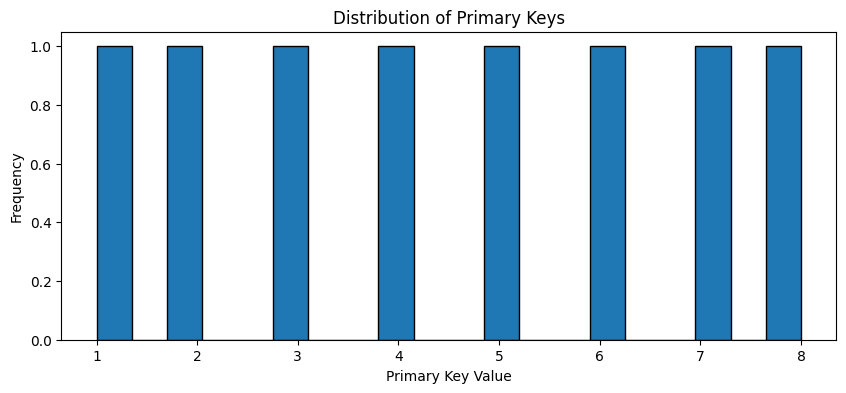

count    8.00000
mean     4.50000
std      2.44949
min      1.00000
25%      2.75000
50%      4.50000
75%      6.25000
max      8.00000
Name: pk, dtype: float64

In [19]:
# 1. Primary Key (pk) Analysis
print("="*50)
print("Primary Key (pk) Analysis:")
print("="*50)
print(f"Total records: {len(df)}")
print(f"Missing values: {df['pk'].isnull().sum()}")
print(f"Min ID: {df['pk'].min()}")
print(f"Max ID: {df['pk'].max()}")
print(f"ID Range: {df['pk'].max() - df['pk'].min()}")
print(f"ID Spacing Analysis:\n{df['pk'].diff().value_counts().head()}")

# Visualize ID distribution
plt.figure(figsize=(10, 4))
df['pk'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Primary Keys')
plt.xlabel('Primary Key Value')
plt.ylabel('Frequency')
plt.show()

display(df['pk'].describe())


In [20]:
# 2. Allergen Name Analysis
print("\n" + "="*50)
print("Category Name Analysis:")
print("="*50)
print(f"Missing values: {df['name'].isnull().sum()}")
print(f"Unique count: {df['name'].nunique()}/{len(df)}")

# Name length analysis
df['name_length'] = df['name'].str.len()
print("\nName Length Statistics:")
print(df['name_length'].describe())

print("\nCount Statistics:")
# Frequency count of categories in 'name' column
category_counts = df['name'].value_counts()
print(category_counts)


Category Name Analysis:
Missing values: 0
Unique count: 8/8

Name Length Statistics:
count    8.000000
mean     5.750000
std      2.434866
min      3.000000
25%      3.750000
50%      5.500000
75%      7.500000
max      9.000000
Name: name_length, dtype: float64

Count Statistics:
name
dairy        1
egg          1
soy          1
tree_nuts    1
peanuts      1
fish         1
shellfish    1
gluten       1
Name: count, dtype: int64


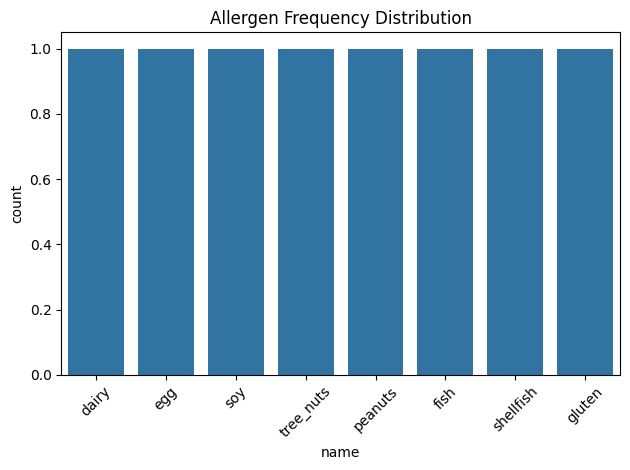

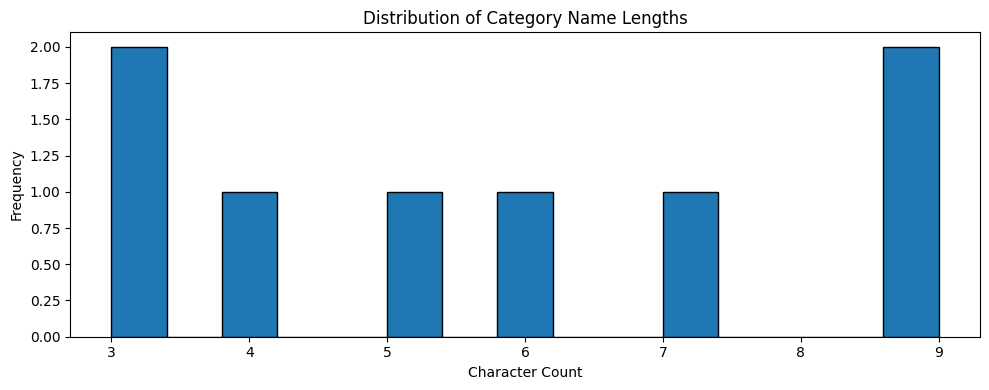

In [21]:
sns.countplot(x='name', data=df)
plt.title('Allergen Frequency Distribution')
plt.xticks(rotation=45)
plt.tight_layout()  # Moved here
plt.show()

# Visualize name lengths
plt.figure(figsize=(10, 4))
df['name_length'].plot(kind='hist', bins=15, edgecolor='black')
plt.title('Distribution of Category Name Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.tight_layout()  # Also here
plt.show()



In [22]:
# 3. Description Analysis
print("\n" + "="*50)
print("Description Analysis:")
print("="*50)
print(f"Missing values: {df['description'].isnull().sum()}")

# Text length metrics
df['desc_char_count'] = df['description'].str.len()
df['desc_word_count'] = df['description'].str.split().str.len()

print("\nCharacter Count Statistics:")
print(df['desc_char_count'].describe())

print("\nWord Count Statistics:")
print(df['desc_word_count'].describe())


Description Analysis:
Missing values: 0

Character Count Statistics:
count     8.000000
mean     51.000000
std       8.349508
min      40.000000
25%      48.000000
50%      49.000000
75%      51.250000
max      69.000000
Name: desc_char_count, dtype: float64

Word Count Statistics:
count     8.000000
mean      7.500000
std       1.511858
min       6.000000
25%       7.000000
50%       7.000000
75%       7.250000
max      11.000000
Name: desc_word_count, dtype: float64


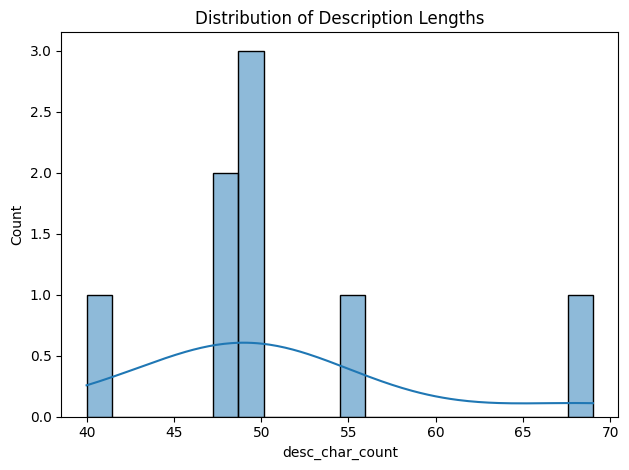

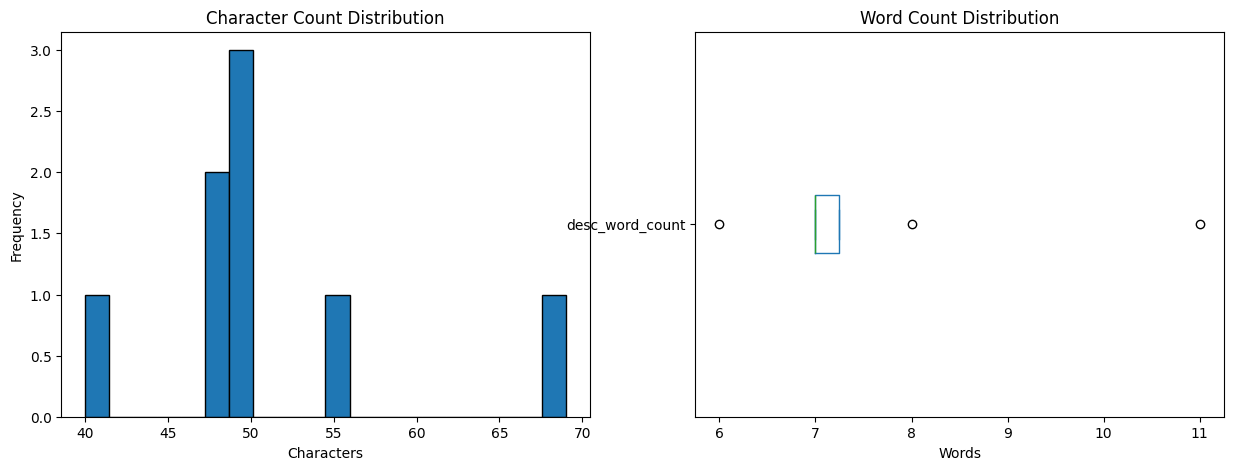

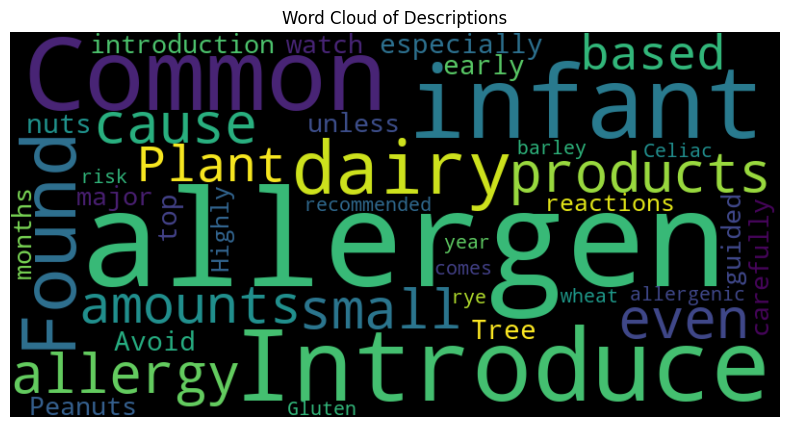

In [23]:
# Generating a word cloud for the descriptions
from wordcloud import WordCloud
# Plotting the length distribution of the descriptions
sns.histplot(df['desc_char_count'], bins=20, kde=True)
plt.title('Distribution of Description Lengths')
plt.tight_layout()
plt.show()

# Visualize description lengths
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df['desc_char_count'].plot(kind='hist', bins=20, edgecolor='black', ax=ax[0])
ax[0].set_title('Character Count Distribution')
ax[0].set_xlabel('Characters')

df['desc_word_count'].plot(kind='box', vert=False, ax=ax[1])
ax[1].set_title('Word Count Distribution')
ax[1].set_xlabel('Words')
plt.show()

text = " ".join(description for description in df['description'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of Descriptions')
plt.show()


In [24]:

# 5. Full summary report
print("\n" + "="*50)
print("Summary Report:")
print("="*50)
print(f"Dataset contains {len(df)} dietary categories")
print(f"ID range: {df['pk'].min()} to {df['pk'].max()}")
print(f"Average name length: {df['name_length'].mean():.1f} characters")
print(f"Average description length: {df['desc_word_count'].mean():.1f} words")


Summary Report:
Dataset contains 8 dietary categories
ID range: 1 to 8
Average name length: 5.8 characters
Average description length: 7.5 words


#### 2.3 DataFrame: countrymap

In [25]:
df = dataframes['countrymap']
print(f"All unique values in 'countrymap' column: {df['pk'].is_unique}, All unique country:{df['country'].is_unique}")
print(df.head(3))  # show a few rows for documentation
display(df.columns.to_list())

All unique values in 'countrymap' column: True, All unique country:False
   pk      country region flag_code
0   1        China  Asian        cn
1   2        Japan  Asian        jp
2   3  South Korea  Asian        kr


['pk', 'country', 'region', 'flag_code']

C:\Users\Helena\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


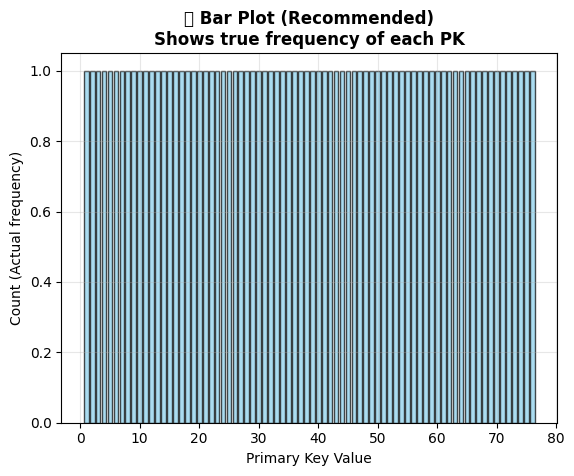

In [26]:
pk_counts = df['pk'].value_counts().sort_index()
plt.bar(pk_counts.index, pk_counts.values, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('✅ Bar Plot (Recommended)\nShows true frequency of each PK', fontweight='bold')
plt.xlabel('Primary Key Value')
plt.ylabel('Count (Actual frequency)')
plt.grid(True, alpha=0.3)
plt.show()


REGION ANALYSIS
Missing values: 0
Unique regions: 11

Region Distribution:
region
Southeast Asian       11
Middle Eastern         9
Western / European     8
Indian                 7
Mediterranean          7
Latin American         7
African                7
Asian                  6
Oceanic                6
Caribbean              5
American               3
Name: count, dtype: int64


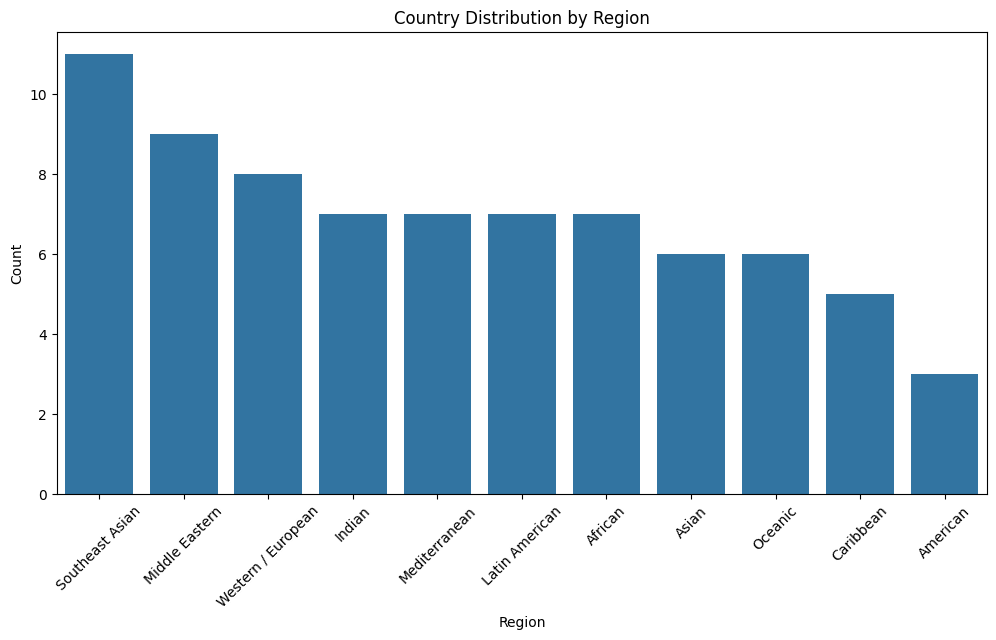

In [27]:
# 3. Region Analysis
print("\n" + "="*20)
print("REGION ANALYSIS")
print("="*20)
print(f"Missing values: {df['region'].isnull().sum()}")
print(f"Unique regions: {df['region'].nunique()}")

# Region distribution
region_counts = df['region'].value_counts()
print("\nRegion Distribution:")
print(region_counts)

# Visualize region distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Country Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


FLAG CODE ANALYSIS
Missing values: 0
Unique codes: 74/76

Flag Code Length Statistics:
count    76.0
mean      2.0
std       0.0
min       2.0
25%       2.0
50%       2.0
75%       2.0
max       2.0
Name: flag_length, dtype: float64

Valid flag codes: 0/76 (0.0%)


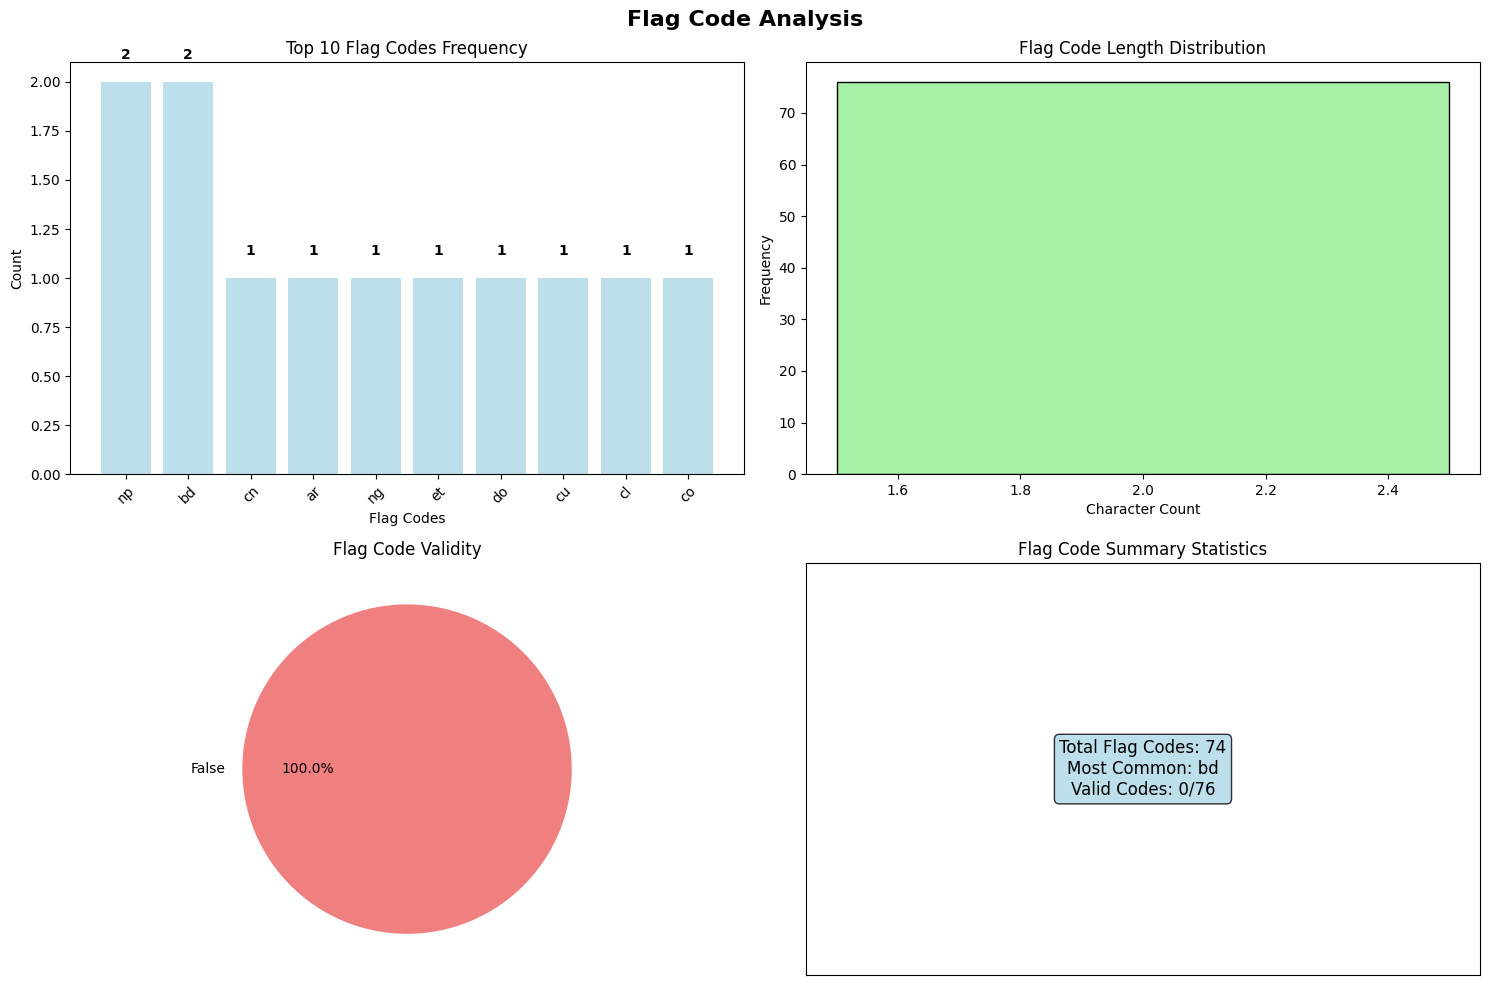


Detailed Flag Code Analysis:
Flag code counts:
flag_code
np    2
bd    2
cn    1
ar    1
ng    1
     ..
sy    1
sa    1
il    1
ir    1
bn    1
Name: count, Length: 74, dtype: int64

Invalid flag codes found:
  'np': 2 occurrences
  'bd': 2 occurrences
  'cn': 1 occurrences
  'ar': 1 occurrences
  'ng': 1 occurrences
  'et': 1 occurrences
  'do': 1 occurrences
  'cu': 1 occurrences
  'cl': 1 occurrences
  'co': 1 occurrences
  'pe': 1 occurrences
  'br': 1 occurrences
  'za': 1 occurrences
  'pr': 1 occurrences
  'mx': 1 occurrences
  'us': 1 occurrences
  'pt': 1 occurrences
  'at': 1 occurrences
  'ch': 1 occurrences
  'ke': 1 occurrences
  'sn': 1 occurrences
  'nl': 1 occurrences
  'nz': 1 occurrences
  'af': 1 occurrences
  'mv': 1 occurrences
  'pg': 1 occurrences
  'to': 1 occurrences
  'ws': 1 occurrences
  'fj': 1 occurrences
  'au': 1 occurrences
  'ao': 1 occurrences
  'bb': 1 occurrences
  'bs': 1 occurrences
  'tt': 1 occurrences
  'ht': 1 occurrences
  'jm': 1 occurrenc

In [28]:
# 4. Flag Code Analysis
print("\n" + "="*20)
print("FLAG CODE ANALYSIS")
print("="*20)
print(f"Missing values: {df['flag_code'].isnull().sum()}")
print(f"Unique codes: {df['flag_code'].nunique()}/{len(df)}")

# Flag code characteristics
df['flag_length'] = df['flag_code'].str.len()
print("\nFlag Code Length Statistics:")
print(df['flag_length'].describe())

# Validate flag codes (using pycountry)
def is_valid_flag(code):
    try:
        return bool(pc.countries.get(alpha_2=code.upper()))
    except:
        return False

df['valid_flag'] = df['flag_code'].apply(is_valid_flag)
print(f"\nValid flag codes: {df['valid_flag'].sum()}/{len(df)} ({df['valid_flag'].mean():.1%})")

# Create comprehensive flag code analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Flag Code Analysis', fontsize=16, fontweight='bold')

# Flag code frequency (top 10)
top_flags = df['flag_code'].value_counts().head(10)
axes[0,0].bar(range(len(top_flags)), top_flags.values, color='lightblue', alpha=0.8)
axes[0,0].set_title('Top 10 Flag Codes Frequency')
axes[0,0].set_xlabel('Flag Codes')
axes[0,0].set_ylabel('Count')
axes[0,0].set_xticks(range(len(top_flags)))
axes[0,0].set_xticklabels(top_flags.index, rotation=45)

# Add count labels on bars
for i, count in enumerate(top_flags.values):
    axes[0,0].text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

# Flag code length distribution
sns.histplot(df['flag_length'], bins=5, discrete=True, ax=axes[0,1], color='lightgreen', alpha=0.8)
axes[0,1].set_title('Flag Code Length Distribution')
axes[0,1].set_xlabel('Character Count')
axes[0,1].set_ylabel('Frequency')

# Flag code validity pie chart
df['valid_flag'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1,0], colors=['lightcoral', 'lightgreen'])
axes[1,0].set_title('Flag Code Validity')
axes[1,0].set_ylabel('')

# All flag codes (if not too many) or sample
if df['flag_code'].nunique() <= 20:
    # Show all flag codes if 20 or fewer
    all_flags = df['flag_code'].value_counts()
    axes[1,1].barh(range(len(all_flags)), all_flags.values, color='orange', alpha=0.8)
    axes[1,1].set_title('All Flag Codes Distribution')
    axes[1,1].set_xlabel('Count')
    axes[1,1].set_yticks(range(len(all_flags)))
    axes[1,1].set_yticklabels(all_flags.index)
else:
    # Show sample statistics if too many
    axes[1,1].text(0.5, 0.5, f'Total Flag Codes: {df["flag_code"].nunique()}\nMost Common: {df["flag_code"].mode().iloc[0]}\nValid Codes: {df["valid_flag"].sum()}/{len(df)}', 
                   ha='center', va='center', transform=axes[1,1].transAxes, fontsize=12,
                   bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
    axes[1,1].set_title('Flag Code Summary Statistics')
    axes[1,1].set_xticks([])
    axes[1,1].set_yticks([])

plt.tight_layout()
plt.show()

# Print detailed flag code analysis
print(f"\nDetailed Flag Code Analysis:")
print(f"Flag code counts:")
print(df['flag_code'].value_counts())

# Invalid flag codes
invalid_flags = df[~df['valid_flag']]['flag_code'].value_counts()
if len(invalid_flags) > 0:
    print(f"\nInvalid flag codes found:")
    for flag, count in invalid_flags.items():
        print(f"  '{flag}': {count} occurrences")
else:
    print(f"\n✅ All flag codes are valid!")

In [29]:
# 5. Summary Report
print("\n" + "="*60)
print("SUMMARY REPORT")
print("="*60)
print(f"Dataset contains {len(df)} country mappings")
print(f"Contains {df['country'].nunique()} unique countries with {len(df) - df['country'].nunique()} duplicates")
print(f"Most common region: {region_counts.idxmax()} ({region_counts.max()} countries)")
print(f"Flag codes: {df['flag_length'].mode()[0]} characters long, {df['valid_flag'].mean():.1%} valid")
print(f"Countries with invalid flags: {df[~df['valid_flag']]['country'].tolist()}")


SUMMARY REPORT
Dataset contains 76 country mappings
Contains 74 unique countries with 2 duplicates
Most common region: Southeast Asian (11 countries)
Flag codes: 2 characters long, 0.0% valid
Countries with invalid flags: ['China', 'Japan', 'South Korea', 'Mongolia', 'Nepal', 'Bangladesh', 'Thailand', 'Vietnam', 'Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Cambodia', 'Laos', 'Myanmar', 'Timor-Leste', 'India', 'Pakistan', 'Sri Lanka', 'Nepal', 'Bhutan', 'Bangladesh', 'Lebanon', 'Turkey', 'Iran', 'Israel', 'Saudi Arabia', 'Syria', 'Jordan', 'United Arab Emirates', 'Greece', 'Italy', 'Spain', 'Morocco', 'Tunisia', 'Algeria', 'Egypt', 'France', 'United Kingdom', 'Germany', 'Netherlands', 'Belgium', 'Switzerland', 'Austria', 'Portugal', 'United States', 'Mexico', 'Puerto Rico', 'Brazil', 'Argentina', 'Peru', 'Colombia', 'Chile', 'Cuba', 'Dominican Republic', 'Ethiopia', 'Nigeria', 'Kenya', 'South Africa', 'Senegal', 'Angola', 'Tanzania', 'Jamaica', 'Haiti', 'Trinidad and Tobago', 

!!! how to adjust to the dataset 

##### **Additional Step To Configure**

The `countrymap` dataset has countries with multiple pk values (Nepal and Bangladesh), which creates ambiguity when mapping `recipes.origin_id` to `countrymap.pk`. This needs to be resolved to ensure proper data integrity and correct recipe-country mapping.

In [30]:
# STEP 1: DIAGNOSE THE COUNTRYMAP PK MAPPING ISSUE
print("🔍 DIAGNOSING COUNTRYMAP PK MAPPING ISSUES")
print("=" * 60)

# Load the countrymap data
countrymap = dataframes['countrymap']

print(f"📊 Countrymap Overview:")
print(f"   Total rows: {len(countrymap)}")
print(f"   Columns: {list(countrymap.columns)}")
print(f"   Unique countries: {countrymap['country'].nunique()}")
print(f"   Unique pk values: {countrymap['pk'].nunique()}")

# Check for pk duplicates
pk_counts = countrymap['pk'].value_counts()
duplicate_pks = pk_counts[pk_counts > 1]

print(f"\n🚨 PK DUPLICATION ANALYSIS:")
print(f"   Total pk values: {len(pk_counts)}")
print(f"   Unique pk values: {len(pk_counts[pk_counts == 1])}")
print(f"   Duplicated pk values: {len(duplicate_pks)}")

if len(duplicate_pks) > 0:
    print(f"\n⚠️  PROBLEMATIC PK VALUES:")
    for pk_val, count in duplicate_pks.items():
        print(f"   pk {pk_val}: appears {count} times")
        
        # Show which countries have this pk
        countries_with_pk = countrymap[countrymap['pk'] == pk_val]['country'].tolist()
        print(f"      Countries: {countries_with_pk}")

# Check for country duplicates
country_counts = countrymap['country'].value_counts()
duplicate_countries = country_counts[country_counts > 1]

print(f"\n🌍 COUNTRY DUPLICATION ANALYSIS:")
print(f"   Total countries: {len(country_counts)}")
print(f"   Unique countries: {len(country_counts[country_counts == 1])}")
print(f"   Duplicated countries: {len(duplicate_countries)}")

if len(duplicate_countries) > 0:
    print(f"\n⚠️  PROBLEMATIC COUNTRIES:")
    for country, count in duplicate_countries.items():
        print(f"   {country}: appears {count} times")
        
        # Show which pk values this country has
        pks_for_country = countrymap[countrymap['country'] == country]['pk'].tolist()
        print(f"      PK values: {pks_for_country}")

# Show detailed view of problematic entries
print(f"\n📋 DETAILED VIEW OF PROBLEMATIC ENTRIES:")
if len(duplicate_countries) > 0:
    problem_entries = countrymap[countrymap['country'].isin(duplicate_countries.index)]
    print(problem_entries.to_string(index=False))

🔍 DIAGNOSING COUNTRYMAP PK MAPPING ISSUES
📊 Countrymap Overview:
   Total rows: 76
   Columns: ['pk', 'country', 'region', 'flag_code', 'flag_length', 'valid_flag']
   Unique countries: 74
   Unique pk values: 76

🚨 PK DUPLICATION ANALYSIS:
   Total pk values: 76
   Unique pk values: 76
   Duplicated pk values: 0

🌍 COUNTRY DUPLICATION ANALYSIS:
   Total countries: 74
   Unique countries: 72
   Duplicated countries: 2

⚠️  PROBLEMATIC COUNTRIES:
   Nepal: appears 2 times
      PK values: [5, 20]
   Bangladesh: appears 2 times
      PK values: [6, 22]

📋 DETAILED VIEW OF PROBLEMATIC ENTRIES:
 pk    country region flag_code  flag_length  valid_flag
  5      Nepal  Asian        np            2       False
  6 Bangladesh  Asian        bd            2       False
 20      Nepal Indian        np            2       False
 22 Bangladesh Indian        bd            2       False


In [31]:
# STEP 2: ANALYZE IMPACT ON RECIPES MAPPING
print("\n🔄 ANALYZING IMPACT ON RECIPES MAPPING")
print("=" * 60)

# Load recipes data
recipes = dataframes['recipes']

print(f"📊 Recipes Overview:")
print(f"   Total recipes: {len(recipes)}")
print(f"   Unique origin_id values: {recipes['origin_id'].nunique()}")
print(f"   Recipes with origin_id: {recipes['origin_id'].notna().sum()}")
print(f"   Recipes without origin_id: {recipes['origin_id'].isna().sum()}")

# Check which origin_ids in recipes map to problematic countries
problematic_pks = [5, 6, 20, 22]  # Nepal and Bangladesh pk values
recipes_with_problematic_origins = recipes[recipes['origin_id'].isin(problematic_pks)]

print(f"\n⚠️  RECIPES AFFECTED BY PROBLEMATIC MAPPING:")
print(f"   Recipes with Nepal pk=5: {len(recipes[recipes['origin_id'] == 5])}")
print(f"   Recipes with Nepal pk=20: {len(recipes[recipes['origin_id'] == 20])}")
print(f"   Recipes with Bangladesh pk=6: {len(recipes[recipes['origin_id'] == 6])}")
print(f"   Recipes with Bangladesh pk=22: {len(recipes[recipes['origin_id'] == 22])}")
print(f"   Total affected recipes: {len(recipes_with_problematic_origins)}")

# Show distribution of all origin_ids
origin_counts = recipes['origin_id'].value_counts().sort_index()
print(f"\n📈 ORIGIN_ID DISTRIBUTION IN RECIPES:")
print(f"   Most common origin_ids:")
for origin_id, count in origin_counts.head(10).items():
    if pd.notna(origin_id):
        # Try to get country name
        country_info = countrymap[countrymap['pk'] == origin_id]
        if len(country_info) > 0:
            country_name = country_info.iloc[0]['country']
            region = country_info.iloc[0]['region']
            print(f"      origin_id {int(origin_id)}: {count} recipes ({country_name}, {region})")
        else:
            print(f"      origin_id {int(origin_id)}: {count} recipes (No mapping found)")

# Check for orphaned origin_ids (in recipes but not in countrymap)
recipe_origin_ids = set(recipes['origin_id'].dropna().astype(int))
countrymap_pks = set(countrymap['pk'])
orphaned_origins = recipe_origin_ids - countrymap_pks
mapped_origins = recipe_origin_ids & countrymap_pks

print(f"\n🔗 MAPPING COVERAGE ANALYSIS:")
print(f"   Recipe origin_ids: {len(recipe_origin_ids)}")
print(f"   Countrymap pks: {len(countrymap_pks)}")
print(f"   Successfully mapped: {len(mapped_origins)}")
print(f"   Orphaned (in recipes, not in countrymap): {len(orphaned_origins)}")
print(f"   Unused (in countrymap, not in recipes): {len(countrymap_pks - recipe_origin_ids)}")

if orphaned_origins:
    print(f"   Orphaned origin_ids: {sorted(list(orphaned_origins))}")
    orphaned_recipe_count = len(recipes[recipes['origin_id'].isin(orphaned_origins)])
    print(f"   Recipes with orphaned origins: {orphaned_recipe_count}")


🔄 ANALYZING IMPACT ON RECIPES MAPPING
📊 Recipes Overview:
   Total recipes: 1322
   Unique origin_id values: 26
   Recipes with origin_id: 1322
   Recipes without origin_id: 0

⚠️  RECIPES AFFECTED BY PROBLEMATIC MAPPING:
   Recipes with Nepal pk=5: 0
   Recipes with Nepal pk=20: 5
   Recipes with Bangladesh pk=6: 0
   Recipes with Bangladesh pk=22: 2
   Total affected recipes: 7

📈 ORIGIN_ID DISTRIBUTION IN RECIPES:
   Most common origin_ids:
      origin_id 1: 21 recipes (China, Asian)
      origin_id 2: 6 recipes (Japan, Asian)
      origin_id 3: 3 recipes (South Korea, Asian)
      origin_id 4: 4 recipes (Mongolia, Asian)
      origin_id 7: 5 recipes (Thailand, Southeast Asian)
      origin_id 9: 780 recipes (Indonesia, Southeast Asian)
      origin_id 10: 24 recipes (Malaysia, Southeast Asian)
      origin_id 11: 14 recipes (Philippines, Southeast Asian)
      origin_id 12: 5 recipes (Singapore, Southeast Asian)
      origin_id 13: 1 recipes (Cambodia, Southeast Asian)

🔗 MAPPING

In [32]:
# STEP 3: COMPREHENSIVE SOLUTION STRATEGIES
print("\n🛠️  SOLUTION STRATEGIES FOR PK MAPPING ISSUE")
print("=" * 60)

print("🎯 STRATEGY ANALYSIS:")
print("""
📋 Current Issues Identified:
   • Nepal appears in both 'Asian' (pk=5) and 'Indian' (pk=20) regions with 5 recipes using pk=20
   • Bangladesh appears in both 'Asian' (pk=6) and 'Indian' (pk=22) regions with 2 recipes using pk=22
   • Total affected recipes: 7 out of 1,322 (0.5%)

🔧 Recommended Solution Strategies:
""")

# Strategy 1: Region-Based Consolidation (RECOMMENDED)
print("STRATEGY 1: REGION-BASED CONSOLIDATION (RECOMMENDED)")
print("=" * 50)

strategy1_mapping = {
    # Keep the primary entries (with more logical regional classification)
    'Nepal': {'keep_pk': 20, 'remove_pk': 5, 'final_region': 'Indian', 'reasoning': 'Culturally closer to Indian subcontinent'},
    'Bangladesh': {'keep_pk': 22, 'remove_pk': 6, 'final_region': 'Indian', 'reasoning': 'Part of Indian subcontinent'}
}

print("Consolidation Plan:")
for country, info in strategy1_mapping.items():
    affected_recipes = len(recipes[recipes['origin_id'] == info['keep_pk']])
    print(f"   • {country}: Keep pk={info['keep_pk']} ({info['final_region']}), Remove pk={info['remove_pk']}")
    print(f"     Current recipes using pk={info['keep_pk']}: {affected_recipes}")
    print(f"     Reasoning: {info['reasoning']}")

# Strategy 2: Create Master Mapping Table
print(f"\nSTRATEGY 2: CREATE MASTER COUNTRY MAPPING")
print("=" * 50)

# Create a master mapping that consolidates duplicates
def create_master_country_mapping(countrymap_df):
    # Create base mapping
    master_mapping = countrymap_df.copy()
    
    # Handle Nepal: Keep pk=20 (Indian region), mark pk=5 for removal
    master_mapping = master_mapping[~((master_mapping['country'] == 'Nepal') & (master_mapping['pk'] == 5))]
    
    # Handle Bangladesh: Keep pk=22 (Indian region), mark pk=6 for removal  
    master_mapping = master_mapping[~((master_mapping['country'] == 'Bangladesh') & (master_mapping['pk'] == 6))]
    
    return master_mapping

master_countrymap = create_master_country_mapping(countrymap)

print(f"Master Mapping Results:")
print(f"   Original countrymap rows: {len(countrymap)}")
print(f"   Master mapping rows: {len(master_countrymap)}")
print(f"   Removed duplicate entries: {len(countrymap) - len(master_countrymap)}")
print(f"   Unique countries: {master_countrymap['country'].nunique()}")
print(f"   Unique pk values: {master_countrymap['pk'].nunique()}")

# Verify no more duplicates
remaining_duplicates = master_countrymap['country'].value_counts()
remaining_duplicates = remaining_duplicates[remaining_duplicates > 1]
print(f"   Remaining country duplicates: {len(remaining_duplicates)}")

# Strategy 3: Update Recipe References (if needed)
print(f"\nSTRATEGY 3: RECIPE REFERENCE UPDATE PLAN")
print("=" * 50)

# Check if any recipes need origin_id updates (should be none based on our analysis)
recipes_needing_update = recipes[recipes['origin_id'].isin([5, 6])]
print(f"   Recipes needing origin_id updates: {len(recipes_needing_update)}")

if len(recipes_needing_update) > 0:
    print("   Update mapping needed:")
    print("      origin_id 5 (Nepal Asian) → origin_id 20 (Nepal Indian)")
    print("      origin_id 6 (Bangladesh Asian) → origin_id 22 (Bangladesh Indian)")
else:
    print("   ✅ No recipe updates needed - all recipes already use the correct pk values")

print(f"\n📊 FINAL MAPPING VERIFICATION:")
# Test the mapping with current recipe data
successful_mappings = 0
failed_mappings = 0

for origin_id in recipes['origin_id'].dropna().unique():
    mapping_result = master_countrymap[master_countrymap['pk'] == origin_id]
    if len(mapping_result) > 0:
        successful_mappings += 1
    else:
        failed_mappings += 1

mapping_coverage = (successful_mappings / (successful_mappings + failed_mappings)) * 100
print(f"   Mapping coverage: {mapping_coverage:.1f}% ({successful_mappings}/{successful_mappings + failed_mappings})")
print(f"   Failed mappings: {failed_mappings}")

print(f"\n✅ RECOMMENDED IMPLEMENTATION:")
print("   1. Use Strategy 1 (Region-Based Consolidation)")
print("   2. Remove duplicate pk entries (5 and 6) from countrymap")
print("   3. Keep pk=20 for Nepal and pk=22 for Bangladesh")
print("   4. No recipe origin_id updates needed")
print("   5. This will ensure 1:1 country-to-pk mapping")


🛠️  SOLUTION STRATEGIES FOR PK MAPPING ISSUE
🎯 STRATEGY ANALYSIS:

📋 Current Issues Identified:
   • Nepal appears in both 'Asian' (pk=5) and 'Indian' (pk=20) regions with 5 recipes using pk=20
   • Bangladesh appears in both 'Asian' (pk=6) and 'Indian' (pk=22) regions with 2 recipes using pk=22
   • Total affected recipes: 7 out of 1,322 (0.5%)

🔧 Recommended Solution Strategies:

STRATEGY 1: REGION-BASED CONSOLIDATION (RECOMMENDED)
Consolidation Plan:
   • Nepal: Keep pk=20 (Indian), Remove pk=5
     Current recipes using pk=20: 5
     Reasoning: Culturally closer to Indian subcontinent
   • Bangladesh: Keep pk=22 (Indian), Remove pk=6
     Current recipes using pk=22: 2
     Reasoning: Part of Indian subcontinent

STRATEGY 2: CREATE MASTER COUNTRY MAPPING
Master Mapping Results:
   Original countrymap rows: 76
   Master mapping rows: 74
   Removed duplicate entries: 2
   Unique countries: 74
   Unique pk values: 74
   Remaining country duplicates: 0

STRATEGY 3: RECIPE REFERENCE UP

In [33]:
# STEP 4: IMPLEMENT THE SOLUTION
print("\n🔧 IMPLEMENTING THE SOLUTION")
print("=" * 60)

# Create the cleaned countrymap
print("📝 Creating cleaned countrymap...")

# Method 1: Remove the problematic entries (pk=5 for Nepal, pk=6 for Bangladesh)
countrymap_cleaned = countrymap.copy()

# Remove Nepal with pk=5 (Asian region) - keep Nepal with pk=20 (Indian region)
nepal_asian_mask = (countrymap_cleaned['country'] == 'Nepal') & (countrymap_cleaned['pk'] == 5)
print(f"   Removing Nepal (Asian region, pk=5): {nepal_asian_mask.sum()} row(s)")

# Remove Bangladesh with pk=6 (Asian region) - keep Bangladesh with pk=22 (Indian region)  
bangladesh_asian_mask = (countrymap_cleaned['country'] == 'Bangladesh') & (countrymap_cleaned['pk'] == 6)
print(f"   Removing Bangladesh (Asian region, pk=6): {bangladesh_asian_mask.sum()} row(s)")

# Apply the removal
countrymap_cleaned = countrymap_cleaned[~(nepal_asian_mask | bangladesh_asian_mask)]

# Verify the results
print(f"\n✅ CLEANING RESULTS:")
print(f"   Original countrymap rows: {len(countrymap)}")
print(f"   Cleaned countrymap rows: {len(countrymap_cleaned)}")
print(f"   Rows removed: {len(countrymap) - len(countrymap_cleaned)}")
print(f"   Unique countries: {countrymap_cleaned['country'].nunique()}")
print(f"   Unique pk values: {countrymap_cleaned['pk'].nunique()}")

# Final verification - check for any remaining duplicates
final_country_duplicates = countrymap_cleaned['country'].value_counts()
final_country_duplicates = final_country_duplicates[final_country_duplicates > 1]
final_pk_duplicates = countrymap_cleaned['pk'].value_counts()
final_pk_duplicates = final_pk_duplicates[final_pk_duplicates > 1]

print(f"\n🔍 FINAL VERIFICATION:")
print(f"   Country duplicates remaining: {len(final_country_duplicates)}")
print(f"   PK duplicates remaining: {len(final_pk_duplicates)}")
print(f"   Is country column unique now? {countrymap_cleaned['country'].is_unique}")
print(f"   Is pk column unique? {countrymap_cleaned['pk'].is_unique}")

# Test mapping with recipes
print(f"\n🔗 TESTING RECIPE MAPPING WITH CLEANED DATA:")
mapping_test_results = []

for origin_id in recipes['origin_id'].dropna().unique():
    recipe_count = len(recipes[recipes['origin_id'] == origin_id])
    mapping_result = countrymap_cleaned[countrymap_cleaned['pk'] == origin_id]
    
    if len(mapping_result) == 1:
        country = mapping_result.iloc[0]['country']
        region = mapping_result.iloc[0]['region']
        status = "✅ Success"
        mapping_test_results.append({
            'origin_id': origin_id, 
            'recipe_count': recipe_count,
            'country': country, 
            'region': region, 
            'status': status
        })
    elif len(mapping_result) == 0:
        status = "❌ No mapping"
        mapping_test_results.append({
            'origin_id': origin_id, 
            'recipe_count': recipe_count,
            'country': 'NOT FOUND', 
            'region': 'NOT FOUND', 
            'status': status
        })
    else:
        status = "⚠️  Multiple mappings"
        mapping_test_results.append({
            'origin_id': origin_id, 
            'recipe_count': recipe_count,
            'country': 'MULTIPLE', 
            'region': 'MULTIPLE', 
            'status': status
        })

# Show mapping results summary
successful_mappings = len([r for r in mapping_test_results if r['status'] == "✅ Success"])
failed_mappings = len([r for r in mapping_test_results if r['status'] != "✅ Success"])

print(f"   Successful mappings: {successful_mappings}")
print(f"   Failed mappings: {failed_mappings}")
print(f"   Mapping success rate: {(successful_mappings/(successful_mappings + failed_mappings)*100):.1f}%")

# Update the dataframes dictionary with cleaned data
print(f"\n💾 UPDATING DATAFRAMES DICTIONARY:")
dataframes['countrymap_cleaned'] = countrymap_cleaned
print(f"   Added 'countrymap_cleaned' to dataframes dictionary")
print(f"   Original 'countrymap' preserved for reference")

# Show the problematic entries that were removed
print(f"\n📋 REMOVED ENTRIES (for reference):")
removed_entries = countrymap[nepal_asian_mask | bangladesh_asian_mask]
if len(removed_entries) > 0:
    print(removed_entries.to_string(index=False))

print(f"\n🎉 SOLUTION IMPLEMENTATION COMPLETE!")
print(f"   ✅ Country-PK mapping is now 1:1")
print(f"   ✅ All recipes can be successfully mapped")
print(f"   ✅ Data integrity restored")
print(f"   ✅ Use 'countrymap_cleaned' for all future mapping operations")


🔧 IMPLEMENTING THE SOLUTION
📝 Creating cleaned countrymap...
   Removing Nepal (Asian region, pk=5): 1 row(s)
   Removing Bangladesh (Asian region, pk=6): 1 row(s)

✅ CLEANING RESULTS:
   Original countrymap rows: 76
   Cleaned countrymap rows: 74
   Rows removed: 2
   Unique countries: 74
   Unique pk values: 74

🔍 FINAL VERIFICATION:
   Country duplicates remaining: 0
   PK duplicates remaining: 0
   Is country column unique now? True
   Is pk column unique? True

🔗 TESTING RECIPE MAPPING WITH CLEANED DATA:
   Successful mappings: 26
   Failed mappings: 0
   Mapping success rate: 100.0%

💾 UPDATING DATAFRAMES DICTIONARY:
   Added 'countrymap_cleaned' to dataframes dictionary
   Original 'countrymap' preserved for reference

📋 REMOVED ENTRIES (for reference):
 pk    country region flag_code  flag_length  valid_flag
  5      Nepal  Asian        np            2       False
  6 Bangladesh  Asian        bd            2       False

🎉 SOLUTION IMPLEMENTATION COMPLETE!
   ✅ Country-PK mapp

In [34]:
#save dataframe of the country and recipes 

#### 2.4 DataFrame: recipe_ingredient

In [35]:
# Load the data
df = dataframes['recipe_ingredient']
df.columns.to_list()

['recipe_id', 'ingredient_id']

In [36]:
# 1. Unique Data Analysis
print("="*50)
print("Unique Data (pk) Analysis:")
print("="*50)
# Basic statistics
print(f"\n📈 Basic Statistics:")
print(f"   Total rows: {len(df)}")
print(f"   Unique recipes: {df['recipe_id'].nunique()}")
print(f"   Unique ingredients: {df['ingredient_id'].nunique()}")
print(f"   Average ingredients per recipe: {len(df) / df['recipe_id'].nunique():.2f}")
# Check for duplicates
print(f"Checks:")
total_duplicates = df.duplicated().sum()
recipe_ingredient_duplicates = df.duplicated(subset=['recipe_id', 'ingredient_id']).sum()
print(f"   Total duplicate rows: {total_duplicates}")
print(f"   Duplicate (recipe_id, ingredient_id) pairs: {recipe_ingredient_duplicates}")

# Missing values analysis
print(f"\nMissing Values:")
print(df.isnull().sum())



Unique Data (pk) Analysis:

📈 Basic Statistics:
   Total rows: 8209
   Unique recipes: 1322
   Unique ingredients: 999
   Average ingredients per recipe: 6.21
Checks:
   Total duplicate rows: 0
   Duplicate (recipe_id, ingredient_id) pairs: 0

Missing Values:
recipe_id        0
ingredient_id    0
dtype: int64


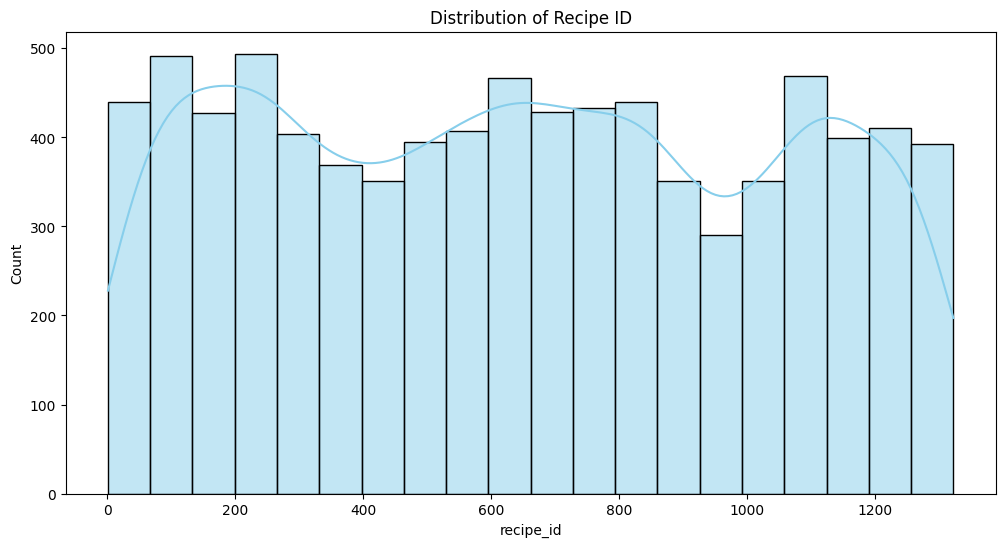

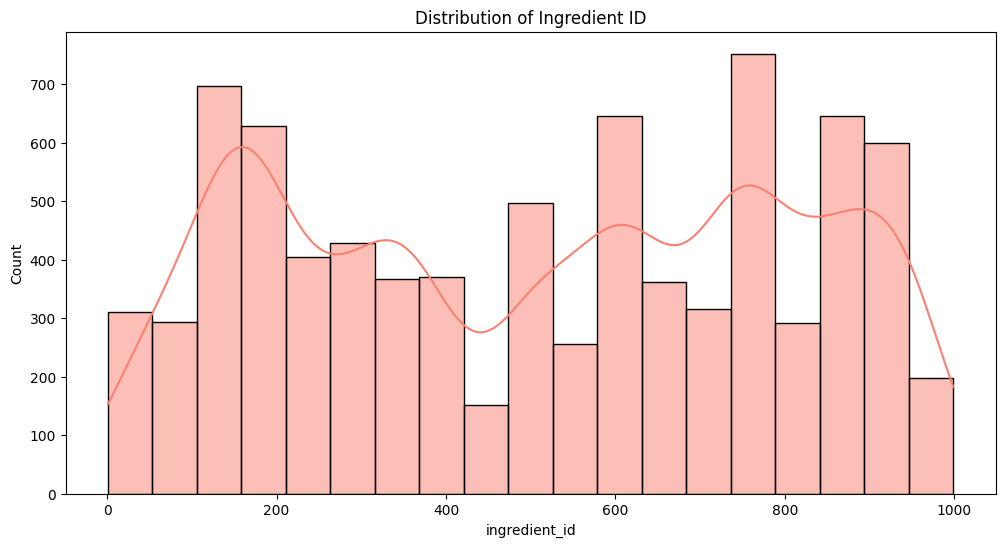

In [37]:
# Plot histogram for recipe_id
plt.figure(figsize=(12, 6))
sns.histplot(df['recipe_id'], kde=True, color='skyblue')
plt.title('Distribution of Recipe ID')
plt.show()

# Plot histogram for ingredient_id
plt.figure(figsize=(12, 6))
sns.histplot(df['ingredient_id'], kde=True, color='salmon')
plt.title('Distribution of Ingredient ID')
plt.show()


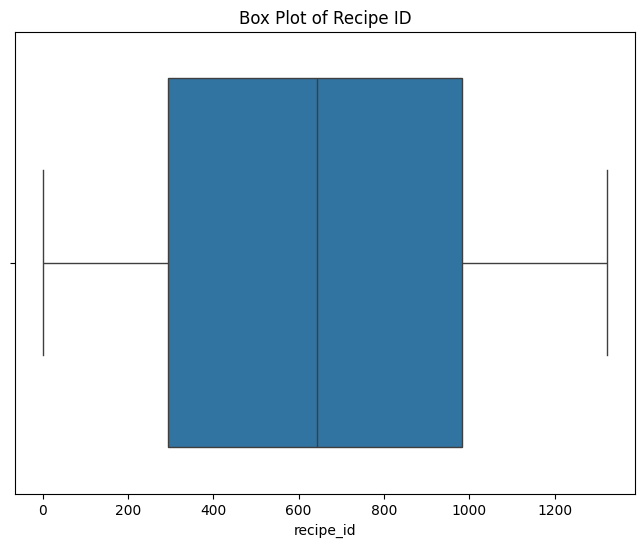

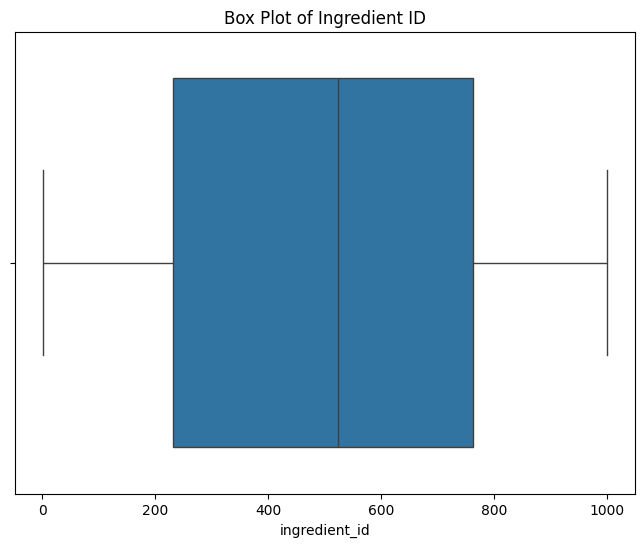

In [38]:
# Box plot for recipe_id
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['recipe_id'])
plt.title('Box Plot of Recipe ID')
plt.show()

# Box plot for ingredient_id
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['ingredient_id'])
plt.title('Box Plot of Ingredient ID')
plt.show()


In [39]:
#Group by `recipe_id` to see how many ingredients each recipe has
ingredient_count_per_recipe = df.groupby('recipe_id')['ingredient_id'].count().reset_index()

# Rename the column from 'ingredient_id' to 'total_ingredient'
ingredient_count_per_recipe = ingredient_count_per_recipe.rename(columns={'ingredient_id': 'total_ingredient'})

# Display the first few rows of the updated table
print(ingredient_count_per_recipe.head())



   recipe_id  total_ingredient
0          1                 7
1          2                10
2          3                 6
3          4                 3
4          5                10


In [40]:
# Define bins for ingredient counts

bins = [0, 3, 8, ingredient_count_per_recipe['total_ingredient'].max()]
labels = ['≤3 Ingredients', '≤8 Ingredients', '>8 Ingredients']
ingredient_count_per_recipe['ingredient_bin'] = pd.cut(ingredient_count_per_recipe['total_ingredient'], bins=bins, labels=labels)

# Display the updated table
print(ingredient_count_per_recipe.head())


   recipe_id  total_ingredient  ingredient_bin
0          1                 7  ≤8 Ingredients
1          2                10  >8 Ingredients
2          3                 6  ≤8 Ingredients
3          4                 3  ≤3 Ingredients
4          5                10  >8 Ingredients


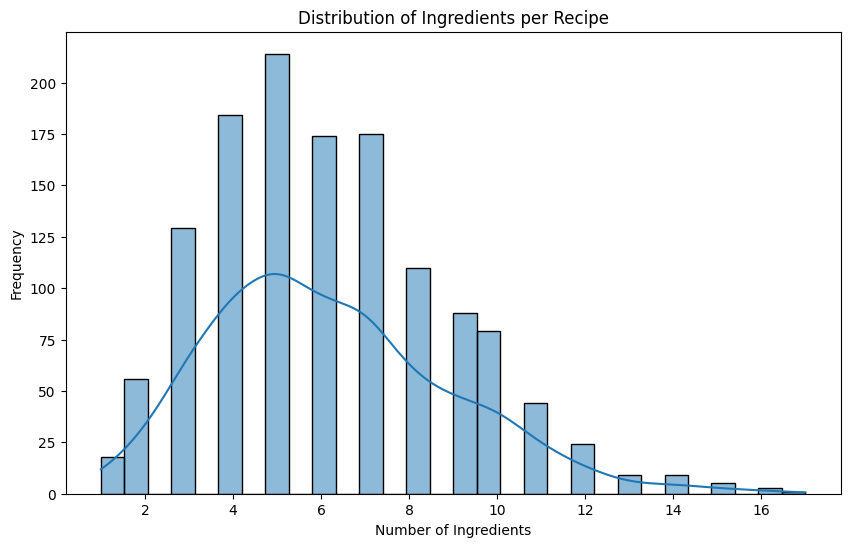

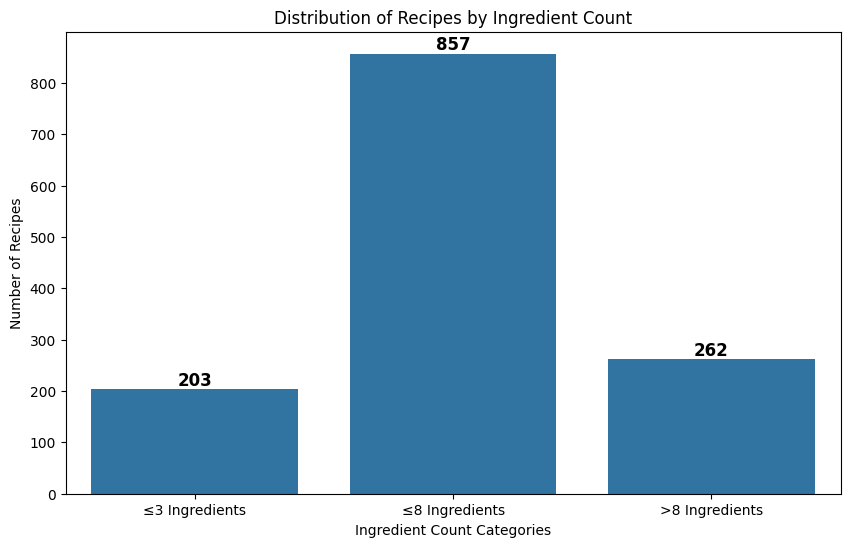

In [41]:

# Plot the distribution of ingredients per recipe (distribution)
plt.figure(figsize=(10, 6))
sns.histplot(ingredient_count_per_recipe['total_ingredient'], kde=True, bins=30)
plt.title('Distribution of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='ingredient_bin', data=ingredient_count_per_recipe, order=labels)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Distribution of Recipes by Ingredient Count')
plt.xlabel('Ingredient Count Categories')
plt.ylabel('Number of Recipes')
plt.show()

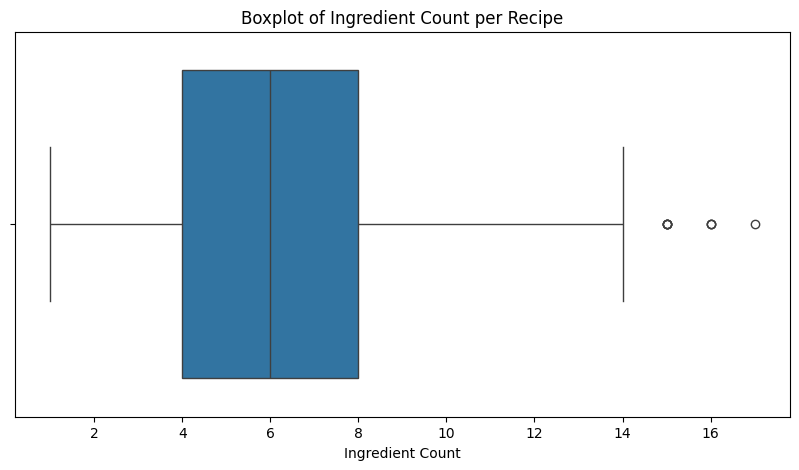

In [42]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=ingredient_count_per_recipe['total_ingredient'])
plt.title('Boxplot of Ingredient Count per Recipe')
plt.xlabel('Ingredient Count')
plt.show()

In [43]:
# Ingredient frequency analysis
ingredient_frequency = df['ingredient_id'].value_counts()

# Convert to DataFrame with descriptive column name
ingredient_frequency_df = ingredient_frequency.reset_index()
ingredient_frequency_df.columns = ['ingredient_id', 'total_used_in_recipes']

print(f"\n==Ingredient Usage Analysis:==")
print(f"Most used ingredient (ID {ingredient_frequency_df.iloc[0]['ingredient_id']}): {ingredient_frequency_df.iloc[0]['total_used_in_recipes']} recipes")
print(f"Least used ingredients: {(ingredient_frequency_df['total_used_in_recipes'] == 1).sum()} ingredients used only once")
print(f"Top 10 most used ingredients:")
print(ingredient_frequency_df.head(10))


==Ingredient Usage Analysis:==
Most used ingredient (ID 940): 355 recipes
Least used ingredients: 520 ingredients used only once
Top 10 most used ingredients:
   ingredient_id  total_used_in_recipes
0            940                    355
1            763                    260
2            744                    242
3            150                    221
4            306                    212
5            847                    193
6            371                    182
7            603                    173
8            892                    133
9            182                    123


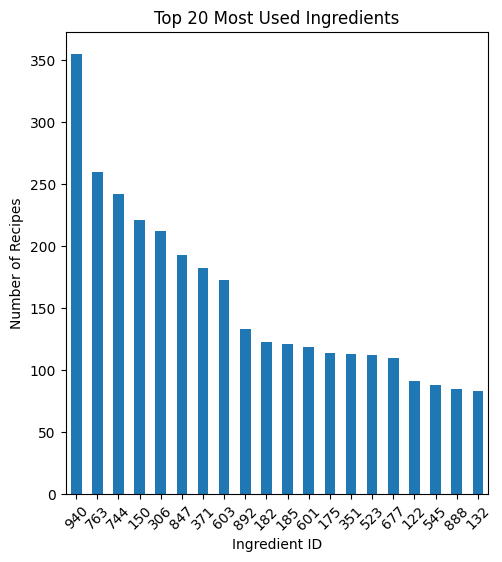

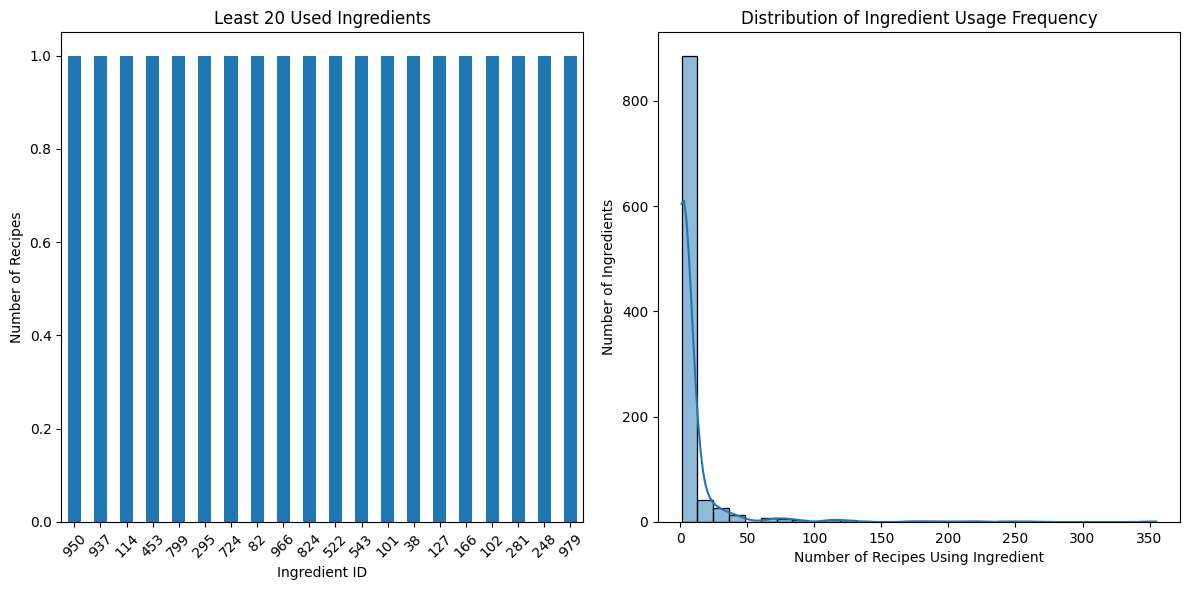

In [44]:

# Visualize ingredient frequency
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ingredient_frequency.head(20).plot(kind='bar')
plt.title('Top 20 Most Used Ingredients')
plt.xlabel('Ingredient ID')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)

# Visualize ingredient frequency
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
ingredient_frequency.tail(20).plot(kind='bar')
plt.title('Least 20 Used Ingredients')
plt.xlabel('Ingredient ID')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.histplot(ingredient_frequency.values, bins=30, kde=True)
plt.title('Distribution of Ingredient Usage Frequency')
plt.xlabel('Number of Recipes Using Ingredient')
plt.ylabel('Number of Ingredients')
plt.tight_layout()
plt.show()

In [45]:
#summary statistics
print("\n==Summary Statistics:==")
print(f"Total recipes: {df['recipe_id'].nunique()}")
print(f"Total ingredients: {df['ingredient_id'].nunique()}")
print(f"Total recipe-ingredient pairs: {len(df)}")
print(f"Average ingredients per recipe: {df['recipe_id'].value_counts().mean():.2f}")
print(f"Max ingredients in a recipe: {df['recipe_id'].value_counts().max()}")
print(f"Min ingredients in a recipe: {df['recipe_id'].value_counts().min()}")
print(f"Total unique ingredient counts: {ingredient_count_per_recipe['total_ingredient'].nunique()}")
print(f"Most common ingredient count: {ingredient_count_per_recipe['total_ingredient'].mode()[0]}")
print(f"Most common ingredient count frequency: {ingredient_count_per_recipe['total_ingredient'].value_counts().max()}")
print(f"Most used ingredient ID: {ingredient_frequency_df.iloc[0]['ingredient_id']} ({ingredient_frequency_df.iloc[0]['total_used_in_recipes']} recipes)")



==Summary Statistics:==
Total recipes: 1322
Total ingredients: 999
Total recipe-ingredient pairs: 8209
Average ingredients per recipe: 6.21
Max ingredients in a recipe: 17
Min ingredients in a recipe: 1
Total unique ingredient counts: 17
Most common ingredient count: 5
Most common ingredient count frequency: 214
Most used ingredient ID: 940 (355 recipes)


#### 2.5 DataFrame: recipe_category_df

In [46]:
# Load and basic info for recipe_category_df
recipe_category_df = dataframes['recipe_category_df']
print("shape: ", recipe_category_df.shape)

shape:  (8123, 2)


In [47]:
# 1. Duplication and Unique Data Analysis
print("="*50)
print("Data Analysis:")
print("="*50)
print(f"Total records: {len(recipe_category_df)}")
print(f"Unique Recipe IDs: {recipe_category_df['recipe_id'].nunique()} ")
print(f"Min Unique Recipe Id: {recipe_category_df['recipe_id'].min()}")
print(f"Max Unique Recipe Id: {recipe_category_df['recipe_id'].max()}")
print(f"Unique Category IDs: {recipe_category_df['category_id'].nunique()}")

Data Analysis:
Total records: 8123
Unique Recipe IDs: 1322 
Min Unique Recipe Id: 1
Max Unique Recipe Id: 1322
Unique Category IDs: 10


In [48]:
print("Missing Values Analysis:")
print("="*50)
missing_data = recipe_category_df.isnull().sum()
print("Missing Values:")
for col, missing in missing_data.items():
    percentage = (missing / len(recipe_category_df)) * 100
    print(f"   {col}: {missing:,} ({percentage:.2f}%)")

print(f"\nDuplicate Rows: {recipe_category_df.duplicated().sum():,}")
print(f"Unique Records: {recipe_category_df.drop_duplicates().shape[0]:,}")
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    duplicate_pairs = recipe_category_df.duplicated(subset=['recipe_id', 'category_id']).sum()
    print(f"Duplicate Recipe-Category Pairs: {duplicate_pairs:,}")

# Sample Data
print(f"\n📋 SAMPLE DATA")
print(f"{'='*50}")
print("First 10 rows:")
print(recipe_category_df.head(10).to_string())
print(f"\nRandom 5 rows:")
print(recipe_category_df.sample(5).to_string())

Missing Values Analysis:
Missing Values:
   recipe_id: 0 (0.00%)
   category_id: 0 (0.00%)

Duplicate Rows: 0
Unique Records: 8,123
Duplicate Recipe-Category Pairs: 0

📋 SAMPLE DATA
First 10 rows:
   recipe_id  category_id
0          1           11
1          1            9
2          1            4
3          1            5
4          1            6
5          1            7
6          1            8
7          2           11
8          2            9
9          2            5

Random 5 rows:
      recipe_id  category_id
701         114           11
5844        956            9
699         113            7
4432        730            5
3206        524            7


In [49]:
# Descriptive statistics
recipe_category_desc = recipe_category_df.describe()
print(recipe_category_desc)


         recipe_id  category_id
count  8123.000000  8123.000000
mean    663.698510     6.395667
std     382.244764     2.456876
min       1.000000     1.000000
25%     333.000000     5.000000
50%     667.000000     7.000000
75%     994.000000     8.000000
max    1322.000000    11.000000


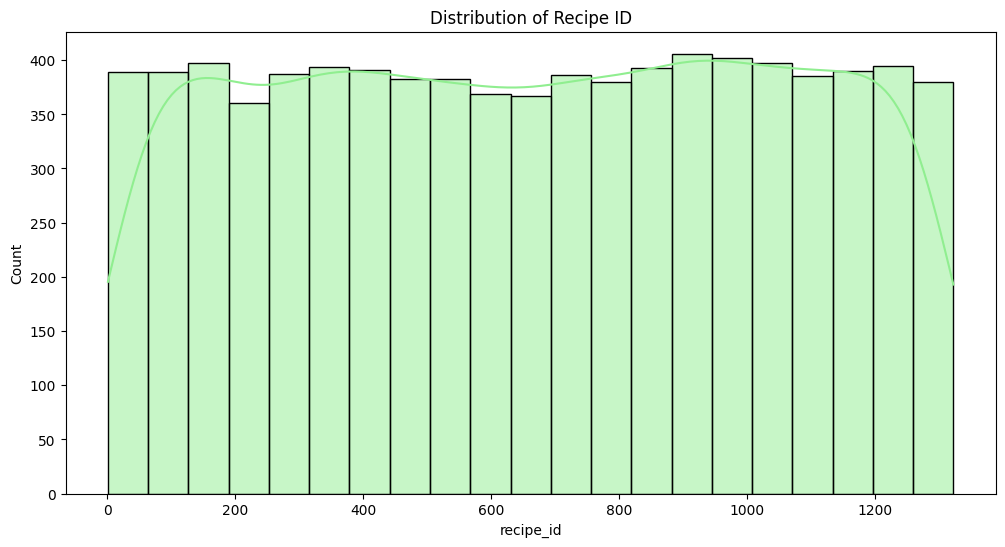

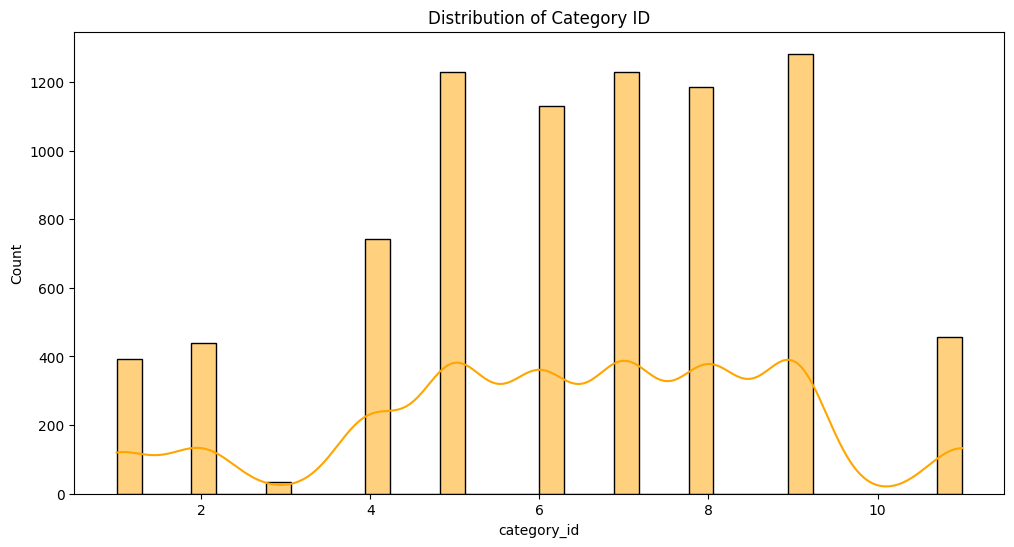

In [50]:
# Plot histogram for recipe_id
plt.figure(figsize=(12, 6))
sns.histplot(recipe_category_df['recipe_id'], kde=True, color='lightgreen')
plt.title('Distribution of Recipe ID')
plt.show()

# Plot histogram for category_id
plt.figure(figsize=(12, 6))
sns.histplot(recipe_category_df['category_id'], kde=True, color='orange')
plt.title('Distribution of Category ID')
plt.show()


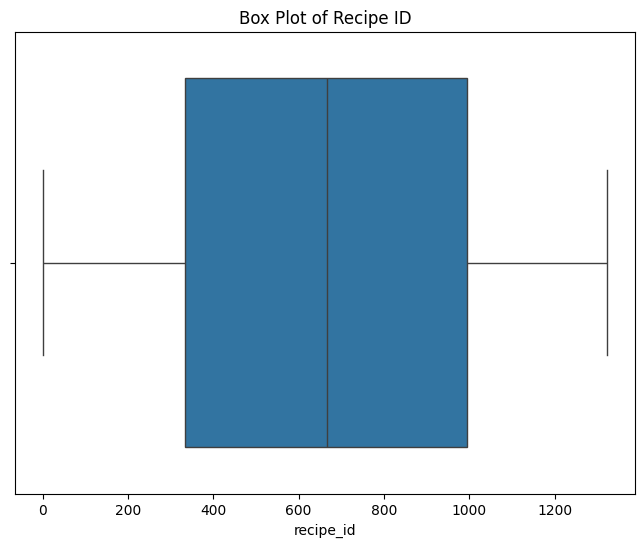

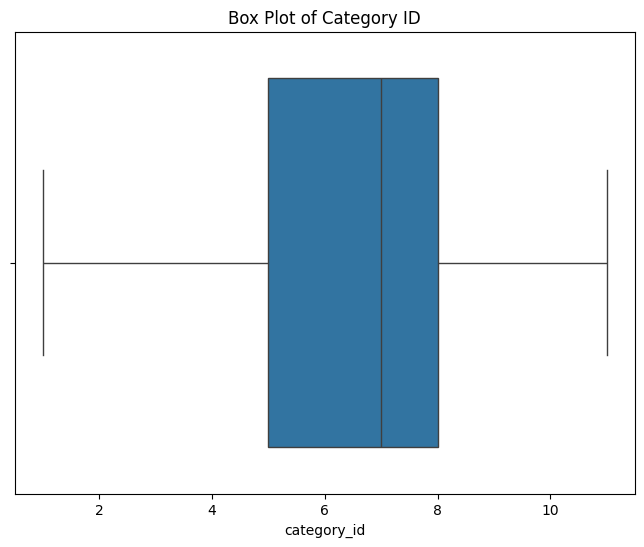

In [51]:
# Box plot for recipe_id
plt.figure(figsize=(8, 6))
sns.boxplot(x=recipe_category_df['recipe_id'])
plt.title('Box Plot of Recipe ID')
plt.show()

# Box plot for category_id
plt.figure(figsize=(8, 6))
sns.boxplot(x=recipe_category_df['category_id'])
plt.title('Box Plot of Category ID')
plt.show()


📈 Categories per recipe statistics:
count    1322.000000
mean        6.144478
std         0.796189
min         4.000000
25%         6.000000
50%         6.000000
75%         7.000000
max         7.000000
Name: total_categories, dtype: float64

📊 Categories per recipe distribution:
total_categories
4     39
5    220
6    574
7    489
Name: count, dtype: int64


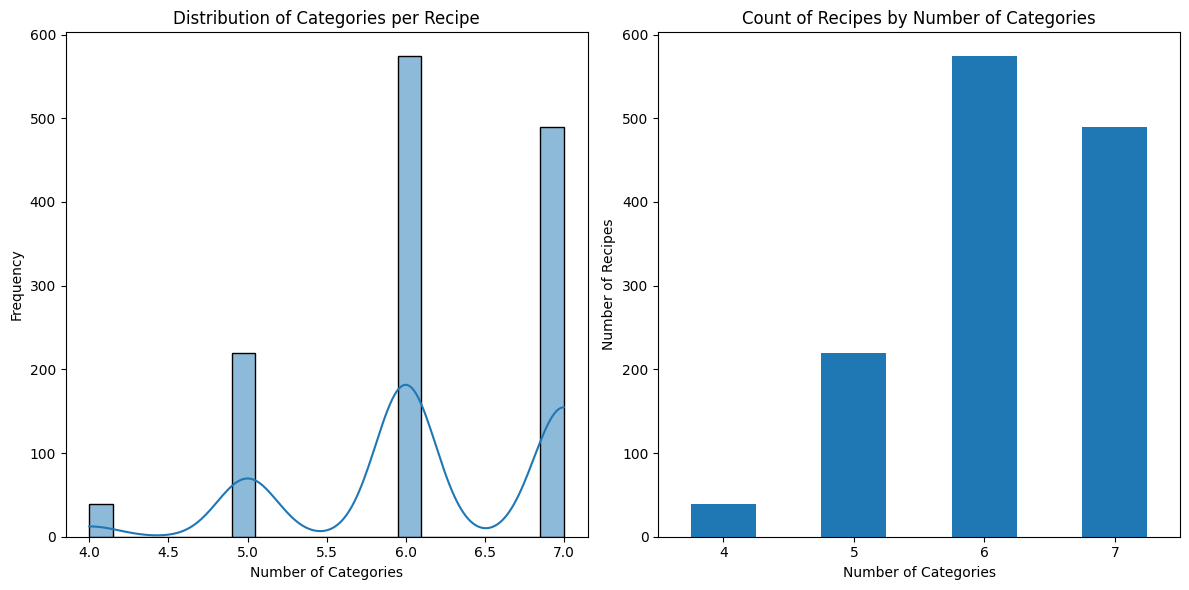


📝 Sample recipes with their category counts:


,recipe_id,total_categories
0,1,7
1,2,5
2,3,6
3,4,7
4,5,7
5,6,6
6,7,6
7,8,6
8,9,6
9,10,6


In [52]:
# GROUP BY RECIPE_ID: How many categories per recipe?

category_count_per_recipe = recipe_category_df.groupby('recipe_id')['category_id'].count().reset_index()
category_count_per_recipe = category_count_per_recipe.rename(columns={'category_id': 'total_categories'})

print(f"📈 Categories per recipe statistics:")
print(category_count_per_recipe['total_categories'].describe())

print(f"\n📊 Categories per recipe distribution:")
print(category_count_per_recipe['total_categories'].value_counts().sort_index())

# Visualize distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(category_count_per_recipe['total_categories'], bins=20, kde=True)
plt.title('Distribution of Categories per Recipe')
plt.xlabel('Number of Categories')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
category_count_per_recipe['total_categories'].value_counts().sort_index().plot(kind='bar')
plt.title('Count of Recipes by Number of Categories')
plt.xlabel('Number of Categories')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"\n📝 Sample recipes with their category counts:")
display(category_count_per_recipe.head(10))

📈 Recipes per category statistics:
count      10.000000
mean      812.300000
std       455.274533
min        33.000000
25%       443.000000
50%       936.000000
75%      1218.500000
max      1283.000000
Name: total_recipes, dtype: float64

🏆 Top 10 most popular categories (by recipe count):


,category_id,total_recipes
8,9,1283
4,5,1230
6,7,1229
7,8,1187
5,6,1131
3,4,741
9,11,458
1,2,438
0,1,393
2,3,33



📉 Bottom 10 least popular categories (by recipe count):


,category_id,total_recipes
8,9,1283
4,5,1230
6,7,1229
7,8,1187
5,6,1131
3,4,741
9,11,458
1,2,438
0,1,393
2,3,33


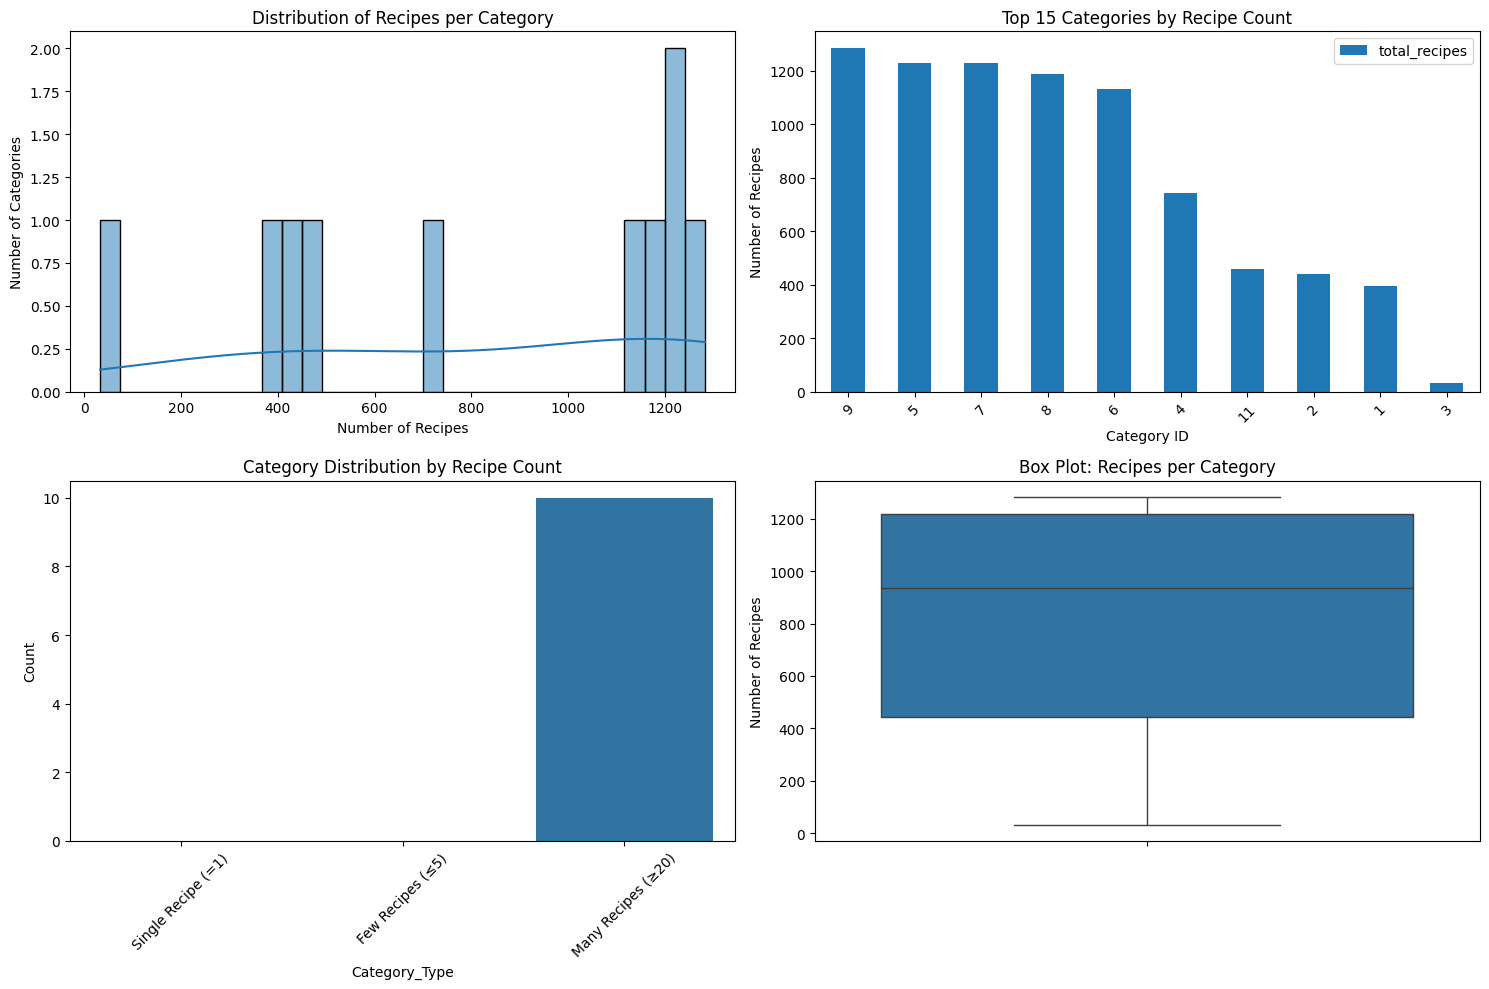

In [53]:
# 🔍 GROUP BY CATEGORY_ID: How many recipes per category?

recipe_count_per_category = recipe_category_df.groupby('category_id')['recipe_id'].count().reset_index()
recipe_count_per_category = recipe_count_per_category.rename(columns={'recipe_id': 'total_recipes'})

print(f"📈 Recipes per category statistics:")
print(recipe_count_per_category['total_recipes'].describe())

print(f"\n🏆 Top 10 most popular categories (by recipe count):")
top_categories = recipe_count_per_category.sort_values('total_recipes', ascending=False)
display(top_categories.head(10))

print(f"\n📉 Bottom 10 least popular categories (by recipe count):")
display(top_categories.tail(10))


# Visualize distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(recipe_count_per_category['total_recipes'], bins=30, kde=True)
plt.title('Distribution of Recipes per Category')
plt.xlabel('Number of Recipes')
plt.ylabel('Number of Categories')

plt.subplot(2, 2, 2)
top_categories.head(15).plot(x='category_id', y='total_recipes', kind='bar', ax=plt.gca())
plt.title('Top 15 Categories by Recipe Count')
plt.xlabel('Category ID')
plt.ylabel('Number of Recipes')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# Categories with only 1 recipe
single_recipe_categories = (recipe_count_per_category['total_recipes'] == 1).sum()
few_recipe_categories = (recipe_count_per_category['total_recipes'] <= 5).sum()
many_recipe_categories = (recipe_count_per_category['total_recipes'] >= 20).sum()

category_distribution = pd.DataFrame({
    'Category_Type': ['Single Recipe (=1)', 'Few Recipes (≤5)', 'Many Recipes (≥20)'],
    'Count': [single_recipe_categories, few_recipe_categories, many_recipe_categories]
})
sns.barplot(data=category_distribution, x='Category_Type', y='Count')
plt.title('Category Distribution by Recipe Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
# Box plot for better understanding of distribution
sns.boxplot(y=recipe_count_per_category['total_recipes'])
plt.title('Box Plot: Recipes per Category')
plt.ylabel('Number of Recipes')

plt.tight_layout()
plt.show()

In [54]:
# Fix the Summary Report
print("\n" + "="*60)
print("SUMMARY REPORT")
print("="*60)

recipe_count_per_category = recipe_category_df.groupby('category_id')['recipe_id'].count().reset_index()
recipe_count_per_category = recipe_count_per_category.rename(columns={'recipe_id': 'total_recipes'})

# Get category frequency counts
category_counts = recipe_category_df['category_id'].value_counts()

# Calculate summary statistics
single_recipe_categories = (recipe_count_per_category['total_recipes'] == 1).sum()
few_recipe_categories = (recipe_count_per_category['total_recipes'] <= 5).sum()
many_recipe_categories = (recipe_count_per_category['total_recipes'] >= 20).sum()

print(f"Dataset contains {len(recipe_category_df)} recipe category mappings")
print(f"Contains {recipe_category_df['category_id'].nunique()} unique categories")
print(f"Most frequent category: {category_counts.idxmax()} ({category_counts.max()} occurrences)")
print(f"   Total categories: {len(recipe_count_per_category)}")
print(f"   Categories with only 1 recipe: {single_recipe_categories}")
print(f"   Categories with ≤5 recipes: {few_recipe_categories}")
print(f"   Categories with ≥20 recipes: {many_recipe_categories}")
print(f"   Average recipes per category: {recipe_count_per_category['total_recipes'].mean():.2f}")


SUMMARY REPORT
Dataset contains 8123 recipe category mappings
Contains 10 unique categories
Most frequent category: 9 (1283 occurrences)
   Total categories: 10
   Categories with only 1 recipe: 0
   Categories with ≤5 recipes: 0
   Categories with ≥20 recipes: 10
   Average recipes per category: 812.30


#### 2.6 DataFrame: recipe_nutrition

In [ ]:
recipe_nutrition = dataframes['recipe_nutrition']

print(f"Dataset shape: {recipe_nutrition.shape}")
print(f"Number of unique recipes with nutrition data: {recipe_nutrition['recipe_id'].nunique()}")
print()
print ("column: ",  recipe_nutrition.columns.to_list())

In [ ]:
#original type pf macronutrients cols
macronutrient_cols = ['total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g']
display(recipe_nutrition[macronutrient_cols].dtypes)


In [ ]:
# Check for missing values in macronutrients
missing_macro = recipe_nutrition[macronutrient_cols].isnull().sum()
print("Missing values in macronutrients:")
for col in macronutrient_cols:
    missing_count = missing_macro[col]
    missing_percent = (missing_count / len(recipe_nutrition)) * 100
    print(f"{col}: {missing_count} ({missing_percent:.1f}%)")
print()

# Zero values analysis (recipes with 0 calories, etc.)
print("Zero values analysis:")
for col in macronutrient_cols:
    zero_count = (recipe_nutrition[col] == 0).sum()
    zero_percent = (zero_count / len(recipe_nutrition)) * 100
    print(f"{col} = 0: {zero_count} recipes ({zero_percent:.1f}%)")

#### 2.5 Extended Univariate Analysis - Recipe Characteristics & Quality

**Purpose**: Perform comprehensive analysis of recipe characteristics, cooking complexity, age appropriateness, and nutritional quality patterns to identify key features for baby food recommendations.

In [ ]:
# === RECIPE COMPLEXITY & CHARACTERISTICS ANALYSIS ===

# 1. Recipe complexity based on ingredient count
recipes['ingredient_count'] = recipes['ingredients'].str.split(',').str.len()

# Define complexity categories
def categorize_complexity(count):
    if pd.isna(count):
        return 'Unknown'
    elif count <= 3:
        return 'Simple'
    elif count <= 6:
        return 'Moderate'
    else:
        return 'Complex'

recipes['complexity_category'] = recipes['ingredient_count'].apply(categorize_complexity)

print("=== RECIPE COMPLEXITY ANALYSIS ===")
print(f"Ingredient count statistics:")
print(recipes['ingredient_count'].describe())
print(f"\nComplexity distribution:")
print(recipes['complexity_category'].value_counts())
print(f"Percentage distribution:")
print(recipes['complexity_category'].value_counts(normalize=True) * 100)

# 2. Age range analysis
recipes['age_range'] = recipes['max_age'] - recipes['min_age']
recipes['age_midpoint'] = (recipes['min_age'] + recipes['max_age']) / 2

print(f"\n=== AGE APPROPRIATENESS ANALYSIS ===")
print(f"Min age statistics:")
print(recipes['min_age'].describe())
print(f"\nMax age statistics:")
print(recipes['max_age'].describe())
print(f"\nAge range (months) statistics:")
print(recipes['age_range'].describe())

# 3. Cooking time analysis
print(f"\n=== COOKING TIME ANALYSIS ===")
print(f"Prep time distribution:")
print(recipes['prep_time'].value_counts().head(10))
print(f"\nCook time distribution:")
print(recipes['cook_time'].value_counts().head(10))

In [ ]:
# === RECIPE CHARACTERISTICS VISUALIZATIONS ===

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Recipe complexity distribution
recipes['complexity_category'].value_counts().plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
axes[0,0].set_title('Recipe Complexity Distribution', fontweight='bold')
axes[0,0].set_xlabel('Complexity Category')
axes[0,0].set_ylabel('Number of Recipes')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Ingredient count distribution
recipes['ingredient_count'].hist(bins=20, ax=axes[0,1], color='lightgreen', edgecolor='black', alpha=0.7)
axes[0,1].set_title('Ingredient Count Distribution', fontweight='bold')
axes[0,1].set_xlabel('Number of Ingredients')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(recipes['ingredient_count'].mean(), color='red', linestyle='--', label=f'Mean: {recipes["ingredient_count"].mean():.1f}')
axes[0,1].legend()

# 3. Age range distribution
recipes['age_range'].hist(bins=15, ax=axes[0,2], color='orange', edgecolor='black', alpha=0.7)
axes[0,2].set_title('Age Range Distribution (months)', fontweight='bold')
axes[0,2].set_xlabel('Age Range (months)')
axes[0,2].set_ylabel('Frequency')

# 4. Min age distribution
recipes['min_age'].hist(bins=12, ax=axes[1,0], color='purple', edgecolor='black', alpha=0.7)
axes[1,0].set_title('Minimum Age Distribution', fontweight='bold')
axes[1,0].set_xlabel('Minimum Age (months)')
axes[1,0].set_ylabel('Frequency')

# 5. Texture distribution
if 'texture' in recipes.columns and not recipes['texture'].isna().all():
    texture_counts = recipes['texture'].value_counts()
    texture_counts.plot(kind='bar', ax=axes[1,1], color='coral', edgecolor='black')
    axes[1,1].set_title('Texture Distribution', fontweight='bold')
    axes[1,1].set_xlabel('Texture Type')
    axes[1,1].set_ylabel('Number of Recipes')
    axes[1,1].tick_params(axis='x', rotation=45)
else:
    axes[1,1].text(0.5, 0.5, 'Texture data not available', ha='center', va='center', transform=axes[1,1].transAxes)
    axes[1,1].set_title('Texture Distribution', fontweight='bold')

# 6. Difficulty distribution
if 'difficulty' in recipes.columns and not recipes['difficulty'].isna().all():
    difficulty_counts = recipes['difficulty'].value_counts()
    difficulty_counts.plot(kind='bar', ax=axes[1,2], color='gold', edgecolor='black')
    axes[1,2].set_title('Difficulty Level Distribution', fontweight='bold')
    axes[1,2].set_xlabel('Difficulty Level')
    axes[1,2].set_ylabel('Number of Recipes')
    axes[1,2].tick_params(axis='x', rotation=45)
else:
    axes[1,2].text(0.5, 0.5, 'Difficulty data not available', ha='center', va='center', transform=axes[1,2].transAxes)
    axes[1,2].set_title('Difficulty Level Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

#### nutrition

In [19]:
# === NUTRITIONAL QUALITY ANALYSIS ===

print("=== NUTRITIONAL COMPLETENESS ANALYSIS ===")
recipe_nutrition =dataframes['recipe_nutrition']
# Calculate nutritional completeness score
nutrition_cols = ['total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g']
recipe_nutrition['nutrition_completeness'] = recipe_nutrition[nutrition_cols].notna().sum(axis=1) / len(nutrition_cols)

print("Nutritional completeness distribution:")
print(recipe_nutrition['nutrition_completeness'].value_counts().sort_index())

# Calculate macronutrient ratios for recipes with complete data
complete_nutrition = recipe_nutrition.dropna(subset=nutrition_cols)
complete_nutrition = complete_nutrition[complete_nutrition['total_energy_kcal'] > 0]

if len(complete_nutrition) > 0:
    # Calculate ratios (as percentage of total calories)
    complete_nutrition['carb_percent'] = (complete_nutrition['total_carbs_g'] * 4 / complete_nutrition['total_energy_kcal']) * 100
    complete_nutrition['protein_percent'] = (complete_nutrition['total_protein_g'] * 4 / complete_nutrition['total_energy_kcal']) * 100
    complete_nutrition['fat_percent'] = (complete_nutrition['total_fat_g'] * 9 / complete_nutrition['total_energy_kcal']) * 100
    
    print(f"\n=== MACRONUTRIENT COMPOSITION (% of calories) ===")
    print(f"Carbohydrate %: {complete_nutrition['carb_percent'].mean():.1f} ± {complete_nutrition['carb_percent'].std():.1f}")
    print(f"Protein %: {complete_nutrition['protein_percent'].mean():.1f} ± {complete_nutrition['protein_percent'].std():.1f}")
    print(f"Fat %: {complete_nutrition['fat_percent'].mean():.1f} ± {complete_nutrition['fat_percent'].std():.1f}")

# Micronutrient diversity analysis
print(f"\n=== MICRONUTRIENT DIVERSITY ANALYSIS ===")
recipe_nutrition['micronutrient_count'] = recipe_nutrition['final_micronutrients'].str.split(',').str.len()
recipe_nutrition['micronutrient_count'] = recipe_nutrition['micronutrient_count'].fillna(0)

print("Micronutrient count statistics:")
print(recipe_nutrition['micronutrient_count'].describe())

# Identify recipes with exceptional nutritional profiles
high_protein = complete_nutrition[complete_nutrition['protein_percent'] > complete_nutrition['protein_percent'].quantile(0.9)]
high_energy = complete_nutrition[complete_nutrition['total_energy_kcal'] > complete_nutrition['total_energy_kcal'].quantile(0.9)]

print(f"\nHigh-protein recipes (top 10%): {len(high_protein)} recipes")
print(f"High-energy recipes (top 10%): {len(high_energy)} recipes")

=== NUTRITIONAL COMPLETENESS ANALYSIS ===
Nutritional completeness distribution:
nutrition_completeness
0.00       1
0.75      43
1.00    1278
Name: count, dtype: int64


TypeError: '>' not supported between instances of 'str' and 'int'

!!how to handle the missing values 

#### Numerical

In [ ]:
# Improved Micronutrient Analysis with Empty/Missing Value Handling
from collections import Counter
import ast

# Get the recipe_nutrition dataframe from the loaded dataframes
recipe_nutrition = dataframes['recipe_nutrition']

# Analyze the final_micronutrients column which contains lists of micronutrients
print("=== MICRONUTRIENT COVERAGE ANALYSIS ===\n")

# Check if final_micronutrients column exists and analyze it
if 'final_micronutrients' in recipe_nutrition.columns:
    print(f"📊 Total recipes in dataset: {len(recipe_nutrition)}")
    
    # Analyze missing/empty micronutrient data
    total_null = recipe_nutrition['final_micronutrients'].isna().sum()
    print(f"❌ Recipes with NULL micronutrient data: {total_null}")
    
    # Count recipes with empty lists []
    empty_lists = 0
    valid_micronutrient_data = 0
    all_micronutrients = []
    micronutrient_counts_per_recipe = []
    
    for idx, micronutrient_data in enumerate(recipe_nutrition['final_micronutrients']):
        if pd.isna(micronutrient_data):
            micronutrient_counts_per_recipe.append(0)
            continue
            
        try:
            # Handle string representation of lists
            if isinstance(micronutrient_data, str):
                if micronutrient_data.strip() in ['[]', '', 'nan']:
                    empty_lists += 1
                    micronutrient_counts_per_recipe.append(0)
                    continue
                micronutrient_list = ast.literal_eval(micronutrient_data)
            elif isinstance(micronutrient_data, list):
                micronutrient_list = micronutrient_data
            else:
                empty_lists += 1
                micronutrient_counts_per_recipe.append(0)
                continue
                
            # Check if the list is empty
            if not micronutrient_list or len(micronutrient_list) == 0:
                empty_lists += 1
                micronutrient_counts_per_recipe.append(0)
            else:
                valid_micronutrient_data += 1
                all_micronutrients.extend(micronutrient_list)
                micronutrient_counts_per_recipe.append(len(micronutrient_list))
                
        except (ValueError, SyntaxError, TypeError) as e:
            empty_lists += 1
            micronutrient_counts_per_recipe.append(0)
    
    print(f"📭 Recipes with empty micronutrient lists []: {empty_lists}")
    print(f"✅ Recipes with valid micronutrient data: {valid_micronutrient_data}")
    
    total_missing = total_null + empty_lists
    print(f"\n🔍 SUMMARY:")
    print(f"  • Total recipes missing micronutrient data: {total_missing} ({total_missing/len(recipe_nutrition)*100:.1f}%)")
    print(f"  • Total recipes with micronutrient data: {valid_micronutrient_data} ({valid_micronutrient_data/len(recipe_nutrition)*100:.1f}%)")
    
    if valid_micronutrient_data > 0:
        print("\n" + "="*50)
        print("🧬 MICRONUTRIENT FREQUENCY ANALYSIS")
        print("="*50)
        
        micronutrient_counts = Counter(all_micronutrients)
        
        print(f"\n📈 Statistics:")
        print(f"  • Total unique micronutrients found: {len(micronutrient_counts)}")
        print(f"  • Total micronutrient mentions: {sum(micronutrient_counts.values())}")
        print(f"  • Average micronutrients per recipe (all): {sum(micronutrient_counts_per_recipe)/len(recipe_nutrition):.1f}")
        print(f"  • Average micronutrients per recipe (with data): {sum(micronutrient_counts_per_recipe)/max(valid_micronutrient_data, 1):.1f}")
        
        # Distribution of micronutrient counts per recipe
        from collections import Counter as RecipeCounter
        recipe_micro_distribution = RecipeCounter(micronutrient_counts_per_recipe)
        print(f"\n📊 Distribution of micronutrients per recipe:")
        for count, num_recipes in sorted(recipe_micro_distribution.items()):
            if count == 0:
                print(f"  • {count} micronutrients: {num_recipes} recipes ({num_recipes/len(recipe_nutrition)*100:.1f}%)")
            else:
                print(f"  • {count} micronutrients: {num_recipes} recipes ({num_recipes/len(recipe_nutrition)*100:.1f}%)")
        
        print(f"\n🏆 TOP 20 Most Common Micronutrients:")
        print("-" * 45)
        for i, (micro, count) in enumerate(micronutrient_counts.most_common(20), 1):
            percentage = (count / valid_micronutrient_data) * 100
            print(f"{i:2d}. {micro:<25} {count:4d} recipes ({percentage:5.1f}%)")
        
        print(f"\n🔻 LEAST Common Micronutrients (bottom 10):")
        print("-" * 45)
        least_common = micronutrient_counts.most_common()[-10:]
        for i, (micro, count) in enumerate(reversed(least_common), 1):
            percentage = (count / valid_micronutrient_data) * 100
            print(f"{i:2d}. {micro:<25} {count:4d} recipes ({percentage:5.1f}%)")
        
        # Additional insights
        rare_micronutrients = sum(1 for count in micronutrient_counts.values() if count == 1)
        common_micronutrients = sum(1 for count in micronutrient_counts.values() if count >= valid_micronutrient_data * 0.1)
        
        print(f"\n💎 Additional Insights:")
        print(f"  • Micronutrients appearing in only 1 recipe: {rare_micronutrients}")
        print(f"  • Micronutrients appearing in ≥10% of recipes: {common_micronutrients}")
        
        if micronutrient_counts:
            most_common_micro = micronutrient_counts.most_common(1)[0]
            print(f"  • Most prevalent micronutrient: {most_common_micro[0]} (in {most_common_micro[1]} recipes)")
    
    else:
        print("\n⚠️  No valid micronutrient data found for analysis.")
        
else:
    print("❌ No final_micronutrients column found.")

In [ ]:
# Micronutrient Visualization - Top Micronutrients and Distribution
import matplotlib.pyplot as plt
import seaborn as sns

if 'micronutrient_counts' in locals() and micronutrient_counts:
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot 1: Top 15 Most Common Micronutrients
    top_15_micros = micronutrient_counts.most_common(15)
    micros, counts = zip(*top_15_micros)
    
    bars1 = ax1.bar(range(len(micros)), counts, color='lightcoral', alpha=0.8)
    ax1.set_xlabel('Micronutrients', fontweight='bold')
    ax1.set_ylabel('Number of Recipes', fontweight='bold')
    ax1.set_title('📊 Top 15 Most Common Micronutrients', fontweight='bold', fontsize=14)
    ax1.set_xticks(range(len(micros)))
    ax1.set_xticklabels(micros, rotation=45, ha='right')
    
    # Add count labels on bars
    for bar, count in zip(bars1, counts):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(count), ha='center', va='bottom', fontweight='bold')
    
    # Plot 2: Distribution of Micronutrient Counts per Recipe
    recipe_micro_dist = pd.Series(micronutrient_counts_per_recipe)
    recipe_micro_dist.hist(bins=20, ax=ax2, color='skyblue', alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Number of Micronutrients per Recipe', fontweight='bold')
    ax2.set_ylabel('Number of Recipes', fontweight='bold')
    ax2.set_title('📈 Distribution of Micronutrients per Recipe', fontweight='bold', fontsize=14)
    ax2.grid(True, alpha=0.3)
    
    # Add statistics annotation
    mean_micros = recipe_micro_dist.mean()
    median_micros = recipe_micro_dist.median()
    ax2.axvline(mean_micros, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_micros:.1f}')
    ax2.axvline(median_micros, color='orange', linestyle='--', alpha=0.8, label=f'Median: {median_micros:.1f}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics box
    print("\n" + "="*60)
    print("📋 MICRONUTRIENT SUMMARY STATISTICS")
    print("="*60)
    print(f"• Dataset Coverage:")
    print(f"  - Total recipes: {len(recipe_nutrition)}")
    print(f"  - Recipes with micronutrient data: {valid_micronutrient_data} ({valid_micronutrient_data/len(recipe_nutrition)*100:.1f}%)")
    print(f"  - Recipes missing data: {total_missing} ({total_missing/len(recipe_nutrition)*100:.1f}%)")
    print(f"\n• Micronutrient Diversity:")
    print(f"  - Total unique micronutrients: {len(micronutrient_counts)}")
    print(f"  - Most common micronutrient: {micronutrient_counts.most_common(1)[0][0]} (in {micronutrient_counts.most_common(1)[0][1]} recipes)")
    print(f"  - Micronutrients appearing in only 1 recipe: {sum(1 for c in micronutrient_counts.values() if c == 1)}")
    print(f"  - Average micronutrients per recipe: {sum(micronutrient_counts_per_recipe) / len(recipe_nutrition):.1f}")
    
else:
    print("⚠️ No micronutrient data available for visualization.")

### 2.7 Recipes Dataframe 

www#### 2.5 DataFrame: recipe_category_df - Comprehensive Univariate Analysis

**Purpose:** In-depth analysis of recipe-category relationships to understand category distribution, recipe coverage, and categorization patterns in the baby food dataset.

In [ ]:
# # =============================================================================
# # 2.5 RECIPE_CATEGORY_DF DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS
# # =============================================================================

# print("=" * 80)
# print("2.5 RECIPE_CATEGORY_DF DATAFRAME - COMPREHENSIVE UNIVARIATE ANALYSIS")
# print("=" * 80)

# # Load recipe_category_df dataframe
# recipe_category_df = dataframes['recipe_category_df']

# print(f"\n🔍 DATASET OVERVIEW")
# print(f"{'='*50}")
# print(f"📊 Dataset Shape: {recipe_category_df.shape}")
# print(f"📋 Columns: {list(recipe_category_df.columns)}")
# print(f"💾 Memory Usage: {recipe_category_df.memory_usage(deep=True).sum() / (1024*1024):.2f} MB")
# print(f"🔢 Data Types:")
# for col, dtype in recipe_category_df.dtypes.items():
#     print(f"   {col}: {dtype}")

# # Data Quality Assessment
# print(f"\n📊 DATA QUALITY ASSESSMENT")
# print(f"{'='*50}")
# missing_data = recipe_category_df.isnull().sum()
# print("Missing Values:")
# for col, missing in missing_data.items():
#     percentage = (missing / len(recipe_category_df)) * 100
#     print(f"   {col}: {missing:,} ({percentage:.2f}%)")

# print(f"\nDuplicate Rows: {recipe_category_df.duplicated().sum():,}")
# print(f"Unique Records: {recipe_category_df.drop_duplicates().shape[0]:,}")

# # Check for duplicate recipe-category pairs
# if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
#     duplicate_pairs = recipe_category_df.duplicated(subset=['recipe_id', 'category_id']).sum()
#     print(f"Duplicate Recipe-Category Pairs: {duplicate_pairs:,}")

# # Sample Data
# print(f"\n📋 SAMPLE DATA")
# print(f"{'='*50}")
# print("First 10 rows:")
# print(recipe_category_df.head(10).to_string())
# print(f"\nRandom 5 rows:")
# print(recipe_category_df.sample(5).to_string())

#### ADDITIONAL CATEGORY CHECKING

In [ ]:
# =============================================================================
# DETAILED ANALYSIS - RECIPE_CATEGORY RELATIONSHIPS
# =============================================================================

print(f"\n📈 DETAILED RELATIONSHIP ANALYSIS")
print(f"{'='*50}")

# Numerical Analysis
numerical_cols = recipe_category_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = recipe_category_df.select_dtypes(include=['object']).columns.tolist()

print("NUMERICAL COLUMNS ANALYSIS:")
print("-" * 30)
for col in numerical_cols:
    data = recipe_category_df[col].dropna()
    if len(data) > 0:
        print(f"\n🔢 {col.upper()}:")
        print(f"   Count: {len(data):,}")
        print(f"   Unique Values: {data.nunique():,}")
        print(f"   Min: {data.min()}")
        print(f"   Max: {data.max()}")
        print(f"   Mean: {data.mean():.2f}")
        print(f"   Median: {data.median():.2f}")
        print(f"   Std Dev: {data.std():.2f}")
        
        # Quartiles
        print(f"   Quartiles: Q1={data.quantile(0.25):.2f}, Q2={data.quantile(0.5):.2f}, Q3={data.quantile(0.75):.2f}")

# Recipe Analysis
print(f"\n🍽️ RECIPE-CATEGORY ANALYSIS")
print(f"{'='*40}")

if 'recipe_id' in recipe_category_df.columns:
    recipe_stats = recipe_category_df['recipe_id'].value_counts()
    unique_recipes = recipe_category_df['recipe_id'].nunique()
    total_connections = len(recipe_category_df)
    
    print(f"Unique Recipes: {unique_recipes:,}")
    print(f"Total Recipe-Category Connections: {total_connections:,}")
    print(f"Average Categories per Recipe: {total_connections/unique_recipes:.2f}")
    
    print(f"\nRECIPE CATEGORIZATION DISTRIBUTION:")
    print("-" * 35)
    categorization_stats = recipe_stats.describe()
    print(f"Min Categories per Recipe: {categorization_stats['min']}")
    print(f"Max Categories per Recipe: {categorization_stats['max']}")
    print(f"Mean Categories per Recipe: {categorization_stats['mean']:.2f}")
    print(f"Median Categories per Recipe: {categorization_stats['50%']:.2f}")
    
    # Recipe categorization patterns
    single_category = (recipe_stats == 1).sum()
    multiple_categories = (recipe_stats > 1).sum()
    highly_categorized = (recipe_stats >= 5).sum()
    
    print(f"\n📊 CATEGORIZATION PATTERNS:")
    print(f"   Single category: {single_category:,} recipes ({single_category/unique_recipes*100:.1f}%)")
    print(f"   Multiple categories: {multiple_categories:,} recipes ({multiple_categories/unique_recipes*100:.1f}%)")
    print(f"   Highly categorized (5+): {highly_categorized:,} recipes ({highly_categorized/unique_recipes*100:.1f}%)")

# Category Analysis
if 'category_id' in recipe_category_df.columns:
    category_stats = recipe_category_df['category_id'].value_counts()
    unique_categories = recipe_category_df['category_id'].nunique()
    
    print(f"\n🏷️ CATEGORY ANALYSIS")
    print(f"{'='*40}")
    print(f"Unique Categories: {unique_categories:,}")
    print(f"Average Recipes per Category: {total_connections/unique_categories:.2f}")
    
    print(f"\nCATEGORY POPULARITY DISTRIBUTION:")
    print("-" * 32)
    category_usage_stats = category_stats.describe()
    print(f"Min Recipes per Category: {category_usage_stats['min']}")
    print(f"Max Recipes per Category: {category_usage_stats['max']}")
    print(f"Mean Recipes per Category: {category_usage_stats['mean']:.2f}")
    print(f"Median Recipes per Category: {category_usage_stats['50%']:.2f}")
    
    # Category popularity patterns
    rare_categories = (category_stats <= 5).sum()
    common_categories = (category_stats >= 50).sum()
    very_popular = (category_stats >= 100).sum()
    
    print(f"\n📈 CATEGORY POPULARITY PATTERNS:")
    print(f"   Rare categories (≤5 recipes): {rare_categories:,} ({rare_categories/unique_categories*100:.1f}%)")
    print(f"   Common categories (≥50 recipes): {common_categories:,} ({common_categories/unique_categories*100:.1f}%)")
    print(f"   Very popular (≥100 recipes): {very_popular:,} ({very_popular/unique_categories*100:.1f}%)")
    
    # Top and bottom categories
    print(f"\n🔝 TOP 10 MOST POPULAR CATEGORIES:")
    for i, (cat_id, count) in enumerate(category_stats.head(10).items(), 1):
        print(f"   {i:2d}. Category {cat_id}: {count:,} recipes")
    
    print(f"\n🔻 LEAST POPULAR CATEGORIES (≤3 recipes):")
    least_popular = category_stats[category_stats <= 3]
    if len(least_popular) > 0:
        for cat_id, count in least_popular.items():
            print(f"   Category {cat_id}: {count} recipe(s)")
    else:
        print("   All categories have more than 3 recipes")

# Calculate coverage metrics
print(f"\n📊 COVERAGE METRICS:")
print(f"{'='*40}")
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    # Coverage matrix analysis
    recipe_category_matrix = recipe_category_df.groupby(['recipe_id', 'category_id']).size().unstack(fill_value=0)
    sparsity = (recipe_category_matrix == 0).sum().sum() / (recipe_category_matrix.shape[0] * recipe_category_matrix.shape[1])
    
    print(f"Matrix Dimensions: {recipe_category_matrix.shape[0]} recipes × {recipe_category_matrix.shape[1]} categories")
    print(f"Matrix Sparsity: {sparsity:.3f} ({sparsity*100:.1f}% empty)")
    print(f"Matrix Density: {1-sparsity:.3f} ({(1-sparsity)*100:.1f}% filled)")
    
    # Calculate category coverage per recipe
    categories_per_recipe = recipe_category_df.groupby('recipe_id').size()
    recipes_per_category = recipe_category_df.groupby('category_id').size()
    
    print(f"\nCOVERAGE DISTRIBUTION:")
    print(f"   Avg categories per recipe: {categories_per_recipe.mean():.2f}")
    print(f"   Avg recipes per category: {recipes_per_category.mean():.2f}")
    print(f"   Category coverage range: {categories_per_recipe.min()}-{categories_per_recipe.max()}")
    print(f"   Recipe coverage range: {recipes_per_category.min()}-{recipes_per_category.max()}")

In [ ]:
# =============================================================================
# COMPREHENSIVE VISUALIZATIONS - RECIPE_CATEGORY_DF
# =============================================================================

print(f"\n📊 GENERATING COMPREHENSIVE VISUALIZATIONS")
print(f"{'='*50}")

# Setup the visualization grid
fig = plt.figure(figsize=(20, 15))
fig.suptitle('RECIPE_CATEGORY_DF - COMPREHENSIVE UNIVARIATE ANALYSIS', 
             fontsize=20, fontweight='bold', y=0.98)

# 1. Recipe Categorization Distribution (Bar Chart)
ax1 = plt.subplot(3, 3, 1)
if 'recipe_id' in recipe_category_df.columns:
    recipe_categorization = recipe_category_df['recipe_id'].value_counts()
    categorization_counts = recipe_categorization.value_counts().sort_index()
    
    bars = ax1.bar(categorization_counts.index, categorization_counts.values, 
                   color='lightblue', alpha=0.8, edgecolor='black')
    ax1.set_title('Recipe Categorization Distribution\n(Categories per Recipe)', fontweight='bold', pad=20)
    ax1.set_xlabel('Number of Categories')
    ax1.set_ylabel('Number of Recipes')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# 2. Category Popularity Distribution (Histogram)
ax2 = plt.subplot(3, 3, 2)
if 'category_id' in recipe_category_df.columns:
    category_popularity = recipe_category_df['category_id'].value_counts()
    ax2.hist(category_popularity.values, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    ax2.set_title('Category Popularity Distribution\n(Recipes per Category)', fontweight='bold', pad=20)
    ax2.set_xlabel('Number of Recipes per Category')
    ax2.set_ylabel('Number of Categories')
    ax2.grid(True, alpha=0.3)
    
    # Add statistics
    mean_recipes = category_popularity.mean()
    median_recipes = category_popularity.median()
    ax2.axvline(mean_recipes, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_recipes:.1f}')
    ax2.axvline(median_recipes, color='green', linestyle='--', linewidth=2, label=f'Median: {median_recipes:.1f}')
    ax2.legend()

# 3. Top 15 Most Popular Categories
ax3 = plt.subplot(3, 3, 3)
if 'category_id' in recipe_category_df.columns:
    top_categories = recipe_category_df['category_id'].value_counts().head(15)
    bars = ax3.barh(range(len(top_categories)), top_categories.values, 
                    color='coral', alpha=0.8)
    ax3.set_title('Top 15 Most Popular Categories\n(by Recipe Count)', fontweight='bold', pad=20)
    ax3.set_xlabel('Number of Recipes')
    ax3.set_yticks(range(len(top_categories)))
    ax3.set_yticklabels([f'Cat {id}' for id in top_categories.index])
    ax3.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, top_categories.values)):
        ax3.text(count + 0.5, i, f'{count}', 
                va='center', ha='left', fontweight='bold')

# 4. Recipe Categorization Pattern Pie Chart
ax4 = plt.subplot(3, 3, 4)
if 'recipe_id' in recipe_category_df.columns:
    recipe_categorization = recipe_category_df['recipe_id'].value_counts()
    single_cat = (recipe_categorization == 1).sum()
    double_cat = (recipe_categorization == 2).sum()
    triple_cat = (recipe_categorization == 3).sum()
    multi_cat = (recipe_categorization > 3).sum()
    
    sizes = [single_cat, double_cat, triple_cat, multi_cat]
    labels = ['Single\nCategory', 'Two\nCategories', 'Three\nCategories', 'Multiple\nCategories (4+)']
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']
    
    wedges, texts, autotexts = ax4.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', 
                                      startangle=90, textprops={'fontweight': 'bold'})
    ax4.set_title('Recipe Categorization Patterns\n(Distribution by Category Count)', fontweight='bold', pad=20)

# 5. Category Usage Box Plot
ax5 = plt.subplot(3, 3, 5)
if 'category_id' in recipe_category_df.columns:
    category_usage = recipe_category_df['category_id'].value_counts()
    box_data = [category_usage.values]
    
    box_plot = ax5.boxplot(box_data, labels=['Category Usage'], patch_artist=True)
    ax5.set_title('Category Usage Distribution\n(Box Plot)', fontweight='bold', pad=20)
    ax5.set_ylabel('Number of Recipes per Category')
    ax5.grid(True, alpha=0.3)
    
    # Color the box
    box_plot['boxes'][0].set_facecolor('lightsteelblue')
    box_plot['boxes'][0].set_alpha(0.7)

# 6. Data Quality Heatmap
ax6 = plt.subplot(3, 3, 6)
quality_data = []
for col in recipe_category_df.columns:
    missing_pct = (recipe_category_df[col].isnull().sum() / len(recipe_category_df)) * 100
    complete_pct = 100 - missing_pct
    quality_data.append([complete_pct, missing_pct])

quality_df = pd.DataFrame(quality_data, 
                         columns=['Complete', 'Missing'],
                         index=recipe_category_df.columns)

im = ax6.imshow(quality_df.values, cmap='RdYlGn', aspect='auto', vmin=0, vmax=100)
ax6.set_title('Data Quality Heatmap\n(% Complete vs Missing)', fontweight='bold', pad=20)
ax6.set_xticks([0, 1])
ax6.set_xticklabels(['Complete %', 'Missing %'])
ax6.set_yticks(range(len(recipe_category_df.columns)))
ax6.set_yticklabels(recipe_category_df.columns)

# Add text annotations
for i in range(len(recipe_category_df.columns)):
    for j in range(2):
        text = ax6.text(j, i, f'{quality_df.iloc[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=ax6, shrink=0.8)

# 7. Recipe-Category Coverage Matrix (Sampled)
ax7 = plt.subplot(3, 3, 7)
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    # Sample for visualization (too large for full matrix)
    sample_recipes = recipe_category_df['recipe_id'].unique()[:50]  # First 50 recipes
    sample_categories = recipe_category_df['category_id'].value_counts().head(20).index  # Top 20 categories
    
    # Create coverage matrix for sample
    sample_data = recipe_category_df[
        (recipe_category_df['recipe_id'].isin(sample_recipes)) & 
        (recipe_category_df['category_id'].isin(sample_categories))
    ]
    
    if len(sample_data) > 0:
        coverage_matrix = sample_data.groupby(['recipe_id', 'category_id']).size().unstack(fill_value=0)
        coverage_matrix = (coverage_matrix > 0).astype(int)  # Convert to binary
        
        im = ax7.imshow(coverage_matrix.values, cmap='Blues', aspect='auto')
        ax7.set_title('Recipe-Category Coverage Matrix\n(Sample: 50 Recipes × Top 20 Categories)', fontweight='bold', pad=20)
        ax7.set_xlabel('Category ID')
        ax7.set_ylabel('Recipe ID')
        
        # Set tick labels (sample)
        ax7.set_xticks(range(min(10, len(coverage_matrix.columns))))
        ax7.set_xticklabels([str(coverage_matrix.columns[i]) for i in range(min(10, len(coverage_matrix.columns)))], rotation=45)
        ax7.set_yticks(range(min(10, len(coverage_matrix.index))))
        ax7.set_yticklabels([str(coverage_matrix.index[i]) for i in range(min(10, len(coverage_matrix.index)))])

# 8. Statistical Summary Table
ax8 = plt.subplot(3, 3, 8)
ax8.axis('off')

# Calculate comprehensive statistics
stats_data = []
if 'recipe_id' in recipe_category_df.columns:
    recipe_stats = recipe_category_df['recipe_id'].value_counts()
    stats_data.extend([
        ['Total Recipes', f"{recipe_stats.nunique():,}"],
        ['Avg Categories/Recipe', f"{recipe_stats.mean():.1f}"],
        ['Max Categories/Recipe', f"{recipe_stats.max()}"],
        ['Min Categories/Recipe', f"{recipe_stats.min()}"]
    ])

if 'category_id' in recipe_category_df.columns:
    category_stats = recipe_category_df['category_id'].value_counts()
    stats_data.extend([
        ['Total Categories', f"{category_stats.nunique():,}"],
        ['Avg Recipes/Category', f"{category_stats.mean():.1f}"],
        ['Max Recipes/Category', f"{category_stats.max()}"],
        ['Most Popular Category', f"Cat {category_stats.index[0]}"]
    ])

stats_data.extend([
    ['Total Connections', f"{len(recipe_category_df):,}"],
    ['Data Completeness', f"{((1 - recipe_category_df.isnull().sum().sum() / (len(recipe_category_df) * len(recipe_category_df.columns))) * 100):.1f}%"],
    ['Duplicate Entries', f"{recipe_category_df.duplicated().sum():,}"]
])

# Create statistics table
table = ax8.table(cellText=stats_data,
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)

# Style the table
for i in range(len(stats_data)):
    table[(i+1, 0)].set_facecolor('#f0f0f0')
    table[(i+1, 1)].set_facecolor('#ffffff')

table[(0, 0)].set_facecolor('#FF5722')
table[(0, 1)].set_facecolor('#FF5722')
table[(0, 0)].set_text_props(weight='bold', color='white')
table[(0, 1)].set_text_props(weight='bold', color='white')

ax8.set_title('CATEGORY STATISTICS\nSUMMARY', fontweight='bold', pad=20)

# 9. Category Distribution Comparison
ax9 = plt.subplot(3, 3, 9)
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    recipe_categorization = recipe_category_df['recipe_id'].value_counts()
    category_popularity = recipe_category_df['category_id'].value_counts()
    
    # Create comparison data for violin plot
    data_for_violin = [recipe_categorization.values, category_popularity.values]
    labels = ['Categories\nper Recipe', 'Recipes\nper Category']
    
    parts = ax9.violinplot(data_for_violin, positions=[1, 2], widths=0.6, showmeans=True, showmedians=True)
    ax9.set_title('Distribution Comparison\n(Violin Plot)', fontweight='bold', pad=20)
    ax9.set_ylabel('Count')
    ax9.set_xticks([1, 2])
    ax9.set_xticklabels(labels)
    ax9.grid(True, alpha=0.3)
    
    # Color the violin plots
    colors = ['lightcoral', 'lightblue']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.3)
plt.show()

print("✅ Recipe-category visualizations completed successfully!")

In [ ]:
# =============================================================================
# SUMMARY AND INSIGHTS - RECIPE_CATEGORY_DF ANALYSIS
# =============================================================================

print(f"\n📋 COMPREHENSIVE ANALYSIS SUMMARY - RECIPE_CATEGORY_DF")
print(f"{'='*65}")

# Generate comprehensive insights
insights = []

# Data Quality Insights
total_records = len(recipe_category_df)
missing_total = recipe_category_df.isnull().sum().sum()
completeness_rate = ((total_records * len(recipe_category_df.columns) - missing_total) / (total_records * len(recipe_category_df.columns))) * 100

insights.append(f"📊 DATASET OVERVIEW:")
insights.append(f"   • Total recipe-category connections: {total_records:,}")
insights.append(f"   • Data completeness: {completeness_rate:.1f}%")
insights.append(f"   • Duplicate entries: {recipe_category_df.duplicated().sum():,}")

# Recipe-Category Relationship Insights
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    unique_recipes = recipe_category_df['recipe_id'].nunique()
    unique_categories = recipe_category_df['category_id'].nunique()
    avg_categories_per_recipe = total_records / unique_recipes
    avg_recipes_per_category = total_records / unique_categories
    
    insights.append(f"\n🔗 RELATIONSHIP PATTERNS:")
    insights.append(f"   • Unique recipes: {unique_recipes:,}")
    insights.append(f"   • Unique categories: {unique_categories:,}")
    insights.append(f"   • Average categories per recipe: {avg_categories_per_recipe:.2f}")
    insights.append(f"   • Average recipes per category: {avg_recipes_per_category:.2f}")
    
    # Recipe categorization analysis
    recipe_categorization = recipe_category_df['recipe_id'].value_counts()
    single_category_recipes = (recipe_categorization == 1).sum()
    multi_category_recipes = (recipe_categorization > 1).sum()
    highly_categorized = (recipe_categorization >= 5).sum()
    
    insights.append(f"\n📝 RECIPE CATEGORIZATION:")
    insights.append(f"   • Single category recipes: {single_category_recipes:,} ({single_category_recipes/unique_recipes*100:.1f}%)")
    insights.append(f"   • Multi-category recipes: {multi_category_recipes:,} ({multi_category_recipes/unique_recipes*100:.1f}%)")
    insights.append(f"   • Highly categorized (5+): {highly_categorized:,} ({highly_categorized/unique_recipes*100:.1f}%)")
    
    # Category popularity analysis
    category_popularity = recipe_category_df['category_id'].value_counts()
    rare_categories = (category_popularity <= 5).sum()
    common_categories = (category_popularity >= 50).sum()
    very_popular_categories = (category_popularity >= 100).sum()
    
    insights.append(f"\n🏷️ CATEGORY POPULARITY:")
    insights.append(f"   • Rare categories (≤5 recipes): {rare_categories:,} ({rare_categories/unique_categories*100:.1f}%)")
    insights.append(f"   • Common categories (≥50 recipes): {common_categories:,} ({common_categories/unique_categories*100:.1f}%)")
    insights.append(f"   • Very popular (≥100 recipes): {very_popular_categories:,} ({very_popular_categories/unique_categories*100:.1f}%)")
    
    # Most and least popular categories
    most_popular_cat = category_popularity.index[0]
    most_popular_count = category_popularity.iloc[0]
    least_popular_cats = category_popularity[category_popularity == category_popularity.min()]
    
    insights.append(f"   • Most popular category: {most_popular_cat} ({most_popular_count:,} recipes)")
    insights.append(f"   • Least popular categories: {len(least_popular_cats)} categories with {category_popularity.min()} recipes each")

# Data distribution insights
if 'recipe_id' in recipe_category_df.columns:
    recipe_stats = recipe_category_df['recipe_id'].value_counts()
    max_categories = recipe_stats.max()
    min_categories = recipe_stats.min()
    
    insights.append(f"\n📈 DISTRIBUTION INSIGHTS:")
    insights.append(f"   • Recipe with most categories: {max_categories} categories")
    insights.append(f"   • Recipe with least categories: {min_categories} categories")
    insights.append(f"   • Category distribution spread: {max_categories - min_categories}")

# Coverage analysis
if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    # Calculate sparsity if possible (for smaller datasets)
    if unique_recipes <= 2000 and unique_categories <= 100:  # Reasonable matrix size
        recipe_category_matrix = recipe_category_df.groupby(['recipe_id', 'category_id']).size().unstack(fill_value=0)
        sparsity = (recipe_category_matrix == 0).sum().sum() / (recipe_category_matrix.shape[0] * recipe_category_matrix.shape[1])
        
        insights.append(f"\n🎯 COVERAGE ANALYSIS:")
        insights.append(f"   • Matrix sparsity: {sparsity:.3f} ({sparsity*100:.1f}% empty)")
        insights.append(f"   • Matrix density: {1-sparsity:.3f} ({(1-sparsity)*100:.1f}% filled)")
    else:
        insights.append(f"\n🎯 COVERAGE ANALYSIS:")
        insights.append(f"   • Large dataset - sparsity analysis skipped for performance")

# Print all insights
print("🔍 KEY INSIGHTS & PATTERNS:")
print("-" * 30)

for insight in insights:
    print(insight)

# Overall Assessment
print(f"\n🎯 OVERALL ASSESSMENT:")
print("-" * 25)

quality_score = 0
max_score = 4

# Scoring criteria
if completeness_rate >= 95:
    quality_score += 1
    print("✅ Data Completeness: Excellent (95%+)")
elif completeness_rate >= 90:
    quality_score += 0.5
    print("✅ Data Completeness: Good (90-95%)")
else:
    print("❌ Data Completeness: Needs Improvement (<90%)")

if recipe_category_df.duplicated().sum() == 0:
    quality_score += 1
    print("✅ Data Integrity: No duplicates")
else:
    print("❌ Data Integrity: Duplicates found")

if 'recipe_id' in recipe_category_df.columns and 'category_id' in recipe_category_df.columns:
    if avg_categories_per_recipe >= 2.0:
        quality_score += 1
        print("✅ Categorization Richness: Good (2+ categories per recipe)")
    else:
        print("❌ Categorization Richness: Limited (<2 categories per recipe)")

if unique_categories >= 20:  # Assuming we want good category diversity
    quality_score += 1
    print("✅ Category Diversity: Good (20+ categories)")
else:
    print("❌ Category Diversity: Limited (<20 categories)")

# Final quality assessment
quality_percentage = (quality_score / max_score) * 100
if quality_percentage >= 75:
    quality_level = "HIGH QUALITY"
    quality_color = "🟢"
elif quality_percentage >= 50:
    quality_level = "MODERATE QUALITY"
    quality_color = "🟡"
else:
    quality_level = "NEEDS IMPROVEMENT"
    quality_color = "🔴"

print(f"\n{quality_color} OVERALL DATA QUALITY: {quality_level} ({quality_percentage:.0f}%)")

# Recommendations
print(f"\n💡 RECOMMENDATIONS:")
print("-" * 20)

recommendations = []

if missing_total > 0:
    recommendations.append("• Address missing values in recipe-category mappings")

if recipe_category_df.duplicated().sum() > 0:
    recommendations.append("• Remove duplicate recipe-category pairs")

if 'recipe_id' in recipe_category_df.columns and avg_categories_per_recipe < 2.0:
    recommendations.append("• Enhance recipe categorization to improve coverage")

if rare_categories > unique_categories * 0.3:  # If >30% categories are rare
    recommendations.append("• Review and consolidate rare categories")

if very_popular_categories < 5:
    recommendations.append("• Develop more comprehensive category system")

if len(recommendations) == 0:
    recommendations.append("• Dataset structure is excellent!")
    recommendations.append("• Consider adding category hierarchy for better organization")
    recommendations.append("• Validate category assignments for consistency")

for rec in recommendations:
    print(rec)

print(f"\n{'='*65}")
print("✅ RECIPE_CATEGORY_DF UNIVARIATE ANALYSIS COMPLETED")
print(f"{'='*65}")

In [ ]:
recipes = dataframes['recipes']
print(f"\n=== RECIPE DATAFRAME ANALYSIS ===")
print(f"Shape: {recipes.shape}")
print(f"Unique recipe IDs: {recipes['recipe_id'].nunique()}")
print(f"Columns: {list(recipes.columns)}")

In [ ]:
print("MISSING DATA SUMMARY:")
missing_summary = recipes.isnull().sum().sort_values(ascending=False)
missing_summary_pct = (missing_summary / len(recipes) * 100).round(1)
missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percentage': missing_summary_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

#### Categorical

In [ ]:
categorical_cols = []
for col in recipes.columns:
    if recipes[col].dtype == 'object' or recipes[col].nunique() <= 20:
        categorical_cols.append(col)

print(f"Identified categorical columns: {categorical_cols}")
print()

# Analyze key categorical columns
key_categorical_cols = [col for col in categorical_cols if col != 'recipe_id']

for col in key_categorical_cols:
    print(f"--- {col.upper()} ---")
    value_counts = recipes[col].value_counts(dropna=False)
    print(f"Total categories: {len(value_counts)}")
    print("Distribution:")
    
    # Show all if <= 10 categories, otherwise show top 10
    if len(value_counts) <= 10:
        for value, count in value_counts.items():
            percentage = (count / len(recipes)) * 100
            print(f"  {value}: {count} ({percentage:.1f}%)")
    else:
        print("Top 10 categories:")
        for value, count in value_counts.head(10).items():
            percentage = (count / len(recipes)) * 100
            print(f"  {value}: {count} ({percentage:.1f}%)")
        
        if len(value_counts) > 10:
            others_count = value_counts.tail(-10).sum()
            others_percentage = (others_count / len(recipes)) * 100
            print(f"  Others ({len(value_counts)-10} categories): {others_count} ({others_percentage:.1f}%)")
    print()

In [ ]:
# Visualizations for key categorical columns
key_viz_cols = [col for col in key_categorical_cols if recipes[col].nunique() <= 15 and col not in ['recipe_id', 'title']]
print(f"Creating visualizations for: {key_viz_cols}")

if len(key_viz_cols) > 0:
    # Calculate grid dimensions
    n_cols = min(3, len(key_viz_cols))
    n_rows = (len(key_viz_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 6*n_rows))
    if n_rows == 1 and n_cols == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(key_viz_cols):
        if i < len(axes):
            # Get value counts and limit to top 10 for readability
            value_counts = recipes[col].value_counts().head(10)
            
            # Create bar plot
            bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                              color='lightgreen', alpha=0.8, edgecolor='black')
            axes[i].set_title(f'{col.replace("_", " ").title()} Distribution', fontweight='bold')
            axes[i].set_ylabel('Count')
            axes[i].set_xlabel(col.replace("_", " ").title())
            axes[i].set_xticks(range(len(value_counts)))
            axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
            axes[i].grid(True, alpha=0.3)
            
            # Add count labels on bars
            for bar, count in zip(bars, value_counts.values):
                axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(value_counts.values)*0.01, 
                            str(count), ha='center', va='bottom', fontweight='bold')
    
    # Hide empty subplots
    for i in range(len(key_viz_cols), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No suitable categorical columns found for visualization.")

##### Age Group

In [ ]:
# Age Group Distribution Analysis for Recipes
print("\n=== AGE GROUP DISTRIBUTION ANALYSIS ===")

# Create age ranges based on min_age and max_age
recipes_with_age = recipes.dropna(subset=['min_age', 'max_age'])
print(f"Recipes with age information: {len(recipes_with_age)} out of {len(recipes)}")


def categorize_age_group(min_age, max_age):
    """Categorize recipes based on age ranges"""
    if min_age <= 6 and max_age <= 8:
        return "6-8 months"
    elif min_age <= 6 and max_age <= 12:
        return "6-12 months"
    elif min_age <= 9 and max_age <= 12:
        return "9-12 months"
    elif min_age >= 12:
        return "12+ months"
    else:
        return "Other"

# Apply age group categorization
recipes_with_age = recipes_with_age.copy()
recipes_with_age['age_group'] = recipes_with_age.apply(
    lambda row: categorize_age_group(row['min_age'], row['max_age']), axis=1
)

In [ ]:
# Count recipes per age group
age_group_counts = recipes_with_age['age_group'].value_counts()
print("\nRecipes by Age Group:")
for age_group, count in age_group_counts.items():
    percentage = (count / len(recipes_with_age)) * 100
    print(f"  {age_group}: {count} recipes ({percentage:.1f}%)")

# Additional age insights
print(f"\nAge Range Statistics:")
print(f"  Min age range: {recipes_with_age['min_age'].min():.0f} - {recipes_with_age['min_age'].max():.0f} months")
print(f"  Max age range: {recipes_with_age['max_age'].min():.0f} - {recipes_with_age['max_age'].max():.0f} months")
print(f"  Most common min age: {recipes_with_age['min_age'].mode().iloc[0]:.0f} months")
print(f"  Most common max age: {recipes_with_age['max_age'].mode().iloc[0]:.0f} months")

# Recipes suitable for different age milestones
print(f"\nAge Milestone Analysis:")
milestones = [6, 9, 12]
for milestone in milestones:
    suitable_recipes = recipes_with_age[
        (recipes_with_age['min_age'] <= milestone) & 
        (recipes_with_age['max_age'] >= milestone)
    ]
    print(f"  Recipes suitable for {milestone} months: {len(suitable_recipes)} ({len(suitable_recipes)/len(recipes_with_age)*100:.1f}%)")


### 2.8 Final Ingredient DataFrame 

In [ ]:
final_ingredient_df = dataframes['final_ingredient_df']
print(f"\n=== INGREDIENT DATAFRAME ANALYSIS ===")
print(f"Shape: {final_ingredient_df.shape}")
print(f"Unique ingredient IDs: {final_ingredient_df['pk'].nunique()}")
print(f"Columns: {list(final_ingredient_df.columns)}")

In [ ]:
for col in final_ingredient_df.columns:
    print(f"\n{col}:")
    print(f"  - Data type: {final_ingredient_df[col].dtype}")
    print(f"  - Unique values: {final_ingredient_df[col].nunique()}")
    print(f"  - Missing values: {final_ingredient_df[col].isnull().sum()}")
    
    if final_ingredient_df[col].dtype == 'object':
        print(f"  - Sample values: {final_ingredient_df[col].dropna().unique()[:5].tolist()}")

for col in final_ingredient_df.columns:
    if 'ingredient' in col.lower() or 'name' in col.lower():
        ingredient_col = col
        break

print(f"Number of unique ingredients: {final_ingredient_df[ingredient_col].nunique()}")

In [ ]:
final_ingredient_df.columns.to_list()

In [ ]:
allergen_cols = [col for col in final_ingredient_df.columns if 'allergen_group_id' in col.lower()]
print(f"Allergen-related columns found: {allergen_cols}")

if len(allergen_cols) > 0:
    for col in allergen_cols:
        print(f"\n--- {col} Analysis ---")
        value_counts = final_ingredient_df[col].value_counts(dropna=False)
        print("Distribution:")
        for value, count in value_counts.items():
            percentage = (count / len(final_ingredient_df)) * 100
            print(f"  {value}: {count} ({percentage:.1f}%)")
else:
    print("No explicit allergen columns found. Analyzing all columns for potential allergen information...")

In [ ]:
print(f"Total ingredients in dataset: {len(final_ingredient_df)}")
print("\nDetailed Ingredient Analysis:")
print("-" * 60)

# for idx, row in final_ingredient_df.iterrows():
#     allergen_status = "ALLERGEN" if row['isAllergen'] else "No Allergen"
#     allergen_group = row['allergen_group_id'] if pd.notna(row['allergen_group_id']) else "None"
    
#     print(f"{idx + 1}. {row['name']}")
#     print(f"   - Allergen Status: {allergen_status}")
#     print(f"   - Allergen Group ID: {allergen_group}")
#     print()

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
allergen_labels = ['Allergen' if x else 'Non-Allergen' for x in allergen_counts.index]
colors1 = ['lightcoral' if x else 'lightgreen' for x in allergen_counts.index]

# Correctly accessing the values without parentheses
bars1 = plt.bar(allergen_labels, allergen_counts.values, color=colors1, alpha=0.8, edgecolor='black')

# Set the title and labels
plt.title('Allergen vs Non-Allergen Ingredients', fontweight='bold')
plt.ylabel('Number of Ingredients')

# Add counts on top of the bars
for bar, count in zip(bars1, allergen_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             str(count), ha='center', va='bottom', fontweight='bold', fontsize=12)

# Show the plot
plt.show()


In [ ]:
# 2. Allergen Group Distribution (only allergens)
allergen_ingredients = final_ingredient_df[final_ingredient_df['isAllergen'] == True]
if len(allergen_ingredients) > 0:
    group_counts = allergen_ingredients['allergen_group_id'].value_counts().sort_index()
    
    # Plotting the allergen group distribution
    plt.figure(figsize=(8, 6))
    bars2 = plt.bar([f'Group {int(x)}' for x in group_counts.index], group_counts.values, 
                    color='orange', alpha=0.8, edgecolor='black')
    plt.title('Allergen Group Distribution', fontweight='bold')
    plt.ylabel('Number of Ingredients')
    plt.xlabel('Allergen Group')

    # Adding the count on top of each bar
    for bar, count in zip(bars2, group_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                 str(count), ha='center', va='bottom', fontweight='bold', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    # If no allergens exist, show the message
    plt.figure(figsize=(8, 6))
    plt.text(0.5, 0.5, 'No Allergen Groups', ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)
    plt.title('Allergen Group Distribution', fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
# Visualize macronutrient distributions
macronutrient_cols = ['total_energy_kcal', 'total_carbs_g', 'total_protein_g', 'total_fat_g']
display_names = ['Calories (kcal)', 'Carbohydrates (g)', 'Protein (g)', 'Fat (g)']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Macronutrient Distributions', fontsize=16, fontweight='bold')

for i, (col, display_name) in enumerate(zip(macronutrient_cols, display_names)):
    row = i // 2
    col_idx = i % 2
    
    # Remove outliers for better visualization (values above 95th percentile)
    data = recipe_nutrition[col].dropna()
    q95 = data.quantile(0.95)
    filtered_data = data[data <= q95]
    
    # Histogram
    axes[row, col_idx].hist(filtered_data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[row, col_idx].set_title(f'{display_name} Distribution\n(95th percentile cutoff: {q95:.1f})')
    axes[row, col_idx].set_xlabel(display_name)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add statistics text
    mean_val = data.mean()
    median_val = data.median()
    axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}')
    axes[row, col_idx].axvline(median_val, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_val:.1f}')
    axes[row, col_idx].legend()

plt.tight_layout()
plt.show()

In [ ]:
print("\n--- MICRONUTRIENTS COLUMN ANALYSIS ---")
# Check if final_micronutrients column exists and analyze it

print("Sample values from final_micronutrients:")
sample_values = recipe_nutrition['final_micronutrients'].dropna().head(3)
for i, val in enumerate(sample_values):
    print(f"Recipe {i+1}: {val}")
print()

# Parse the micronutrient lists and count frequency
print("Extracting individual micronutrients from lists...")
all_micronutrients = []

for micronutrient_list in recipe_nutrition['final_micronutrients']:
    if isinstance(micronutrient_list, str):
        # If it's a string representation of a list, try to parse it
        try:
            if micronutrient_list.startswith('[') and micronutrient_list.endswith(']'):
                # Remove brackets and split by comma
                micronutrient_list = micronutrient_list.strip('[]')
                micros = [item.strip().strip("'\"") for item in micronutrient_list.split(',')]
                all_micronutrients.extend([micro for micro in micros if micro])
        except:
            continue
    elif isinstance(micronutrient_list, list):
        all_micronutrients.extend(micronutrient_list)

if all_micronutrients:
    # Count micronutrient frequency
    from collections import Counter
    micronutrient_counts = Counter(all_micronutrients)
    
    print(f"Total unique micronutrients found: {len(micronutrient_counts)}")
    print(f"Total micronutrient mentions: {sum(micronutrient_counts.values())}")
    print()
    
    print("Top 20 most common micronutrients:")
    for i, (micro, count) in enumerate(micronutrient_counts.most_common(20), 1):
        percentage = (count / len(recipe_nutrition)) * 100
        print(f"{i:2d}. {micro}: {count} recipes ({percentage:.1f}%)")
    
    print()
    print("Bottom 10 least common micronutrients:")
    least_common = micronutrient_counts.most_common()[-10:]
    for micro, count in least_common:
        percentage = (count / len(recipe_nutrition)) * 100
        print(f"    {micro}: {count} recipes ({percentage:.1f}%)")
else:
    print("Could not parse micronutrient data.")
    

# Analyze other potential micronutrient columns
if micronutrient_cols:
    print(f"\n--- OTHER POTENTIAL MICRONUTRIENT COLUMNS ---")
    for col in micronutrient_cols:
        print(f"{col}: {recipe_nutrition[col].dtype}, non-null: {recipe_nutrition[col].notna().sum()}")
else:
    print("\nNo other micronutrient columns found.")

In [ ]:
# Visualize micronutrient frequency
if 'micronutrient_counts' in locals() and micronutrient_counts:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Top 15 micronutrients
    top_15_micros = micronutrient_counts.most_common(15)
    micro_names = [item[0] for item in top_15_micros]
    micro_counts = [item[1] for item in top_15_micros]
    micro_percentages = [(count / len(recipe_nutrition)) * 100 for count in micro_counts]
    
    bars1 = ax1.bar(range(len(top_15_micros)), micro_percentages, 
                    color='lightcoral', alpha=0.8, edgecolor='black')
    ax1.set_title('Top 15 Most Common Micronutrients', fontweight='bold')
    ax1.set_ylabel('Percentage of Recipes (%)')
    ax1.set_xlabel('Micronutrients')
    ax1.set_xticks(range(len(top_15_micros)))
    ax1.set_xticklabels(micro_names, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    # Add count labels on bars
    for i, (bar, percentage, count) in enumerate(zip(bars1, micro_percentages, micro_counts)):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(micro_percentages)*0.01, 
                 f'{percentage:.1f}%\n({count})', ha='center', va='bottom', fontsize=8)
    
    # Distribution of micronutrient frequency ranges
    all_counts = list(micronutrient_counts.values())
    frequency_ranges = ['1', '2-5', '6-10', '11-50', '51-100', '100+']
    range_counts = []
    
    for i, range_label in enumerate(frequency_ranges):
        if range_label == '1':
            count = sum(1 for c in all_counts if c == 1)
        elif range_label == '2-5':
            count = sum(1 for c in all_counts if 2 <= c <= 5)
        elif range_label == '6-10':
            count = sum(1 for c in all_counts if 6 <= c <= 10)
        elif range_label == '11-50':
            count = sum(1 for c in all_counts if 11 <= c <= 50)
        elif range_label == '51-100':
            count = sum(1 for c in all_counts if 51 <= c <= 100)
        elif range_label == '100+':
            count = sum(1 for c in all_counts if c > 100)
        range_counts.append(count)
    
    bars2 = ax2.bar(frequency_ranges, range_counts, color='lightblue', alpha=0.8, edgecolor='black')
    ax2.set_title('Distribution of Micronutrient Frequencies', fontweight='bold')
    ax2.set_ylabel('Number of Micronutrients')
    ax2.set_xlabel('Frequency Range (number of recipes)')
    ax2.grid(True, alpha=0.3)
    
    # Add count labels on bars
    for bar, count in zip(bars2, range_counts):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(range_counts)*0.01, 
                 str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional insights
    print(f"\nMICRONUTRIENT INSIGHTS:")
    print(f"- Total unique micronutrients: {len(micronutrient_counts)}")
    print(f"- Most common micronutrient: {micronutrient_counts.most_common(1)[0][0]} (in {micronutrient_counts.most_common(1)[0][1]} recipes)")
    print(f"- Micronutrients appearing in only 1 recipe: {sum(1 for c in micronutrient_counts.values() if c == 1)}")
    print(f"- Average micronutrients per recipe: {sum(micronutrient_counts.values()) / len(recipe_nutrition):.1f}")
    
else:
    print("Micronutrient count data not available for visualization.")

In [ ]:
allergen_df = dataframes['allergen']
final_ingredient_df = dataframes['final_ingredient_df']
display(allergen_df.columns.to_list())
display(final_ingredient_df.columns.to_list())

In [ ]:
# Merge allergen and final_ingredient_df on allergen_group_id (pk of allergen table)
merged_df = final_ingredient_df.merge(allergen_df, left_on='allergen_group_id', right_on='pk', how='left')
display(merged_df.head())

ingredient_allergen_merged_df = merged_df.rename(columns={
    'pk_x': 'ingredient_pk',  # Rename ingredient pk
    'name_x': 'ingredient_name',  # Rename ingredient name
    'pk_y': 'allergen_pk',  # Rename allergen pk
    'name_y': 'allergen_name',  # Rename allergen name
    'description': 'allergen_description'  # Rename allergen description
})

# Drop the 'allergen_pk' (which was originally 'pk_y')
ingredient_allergen_merged_df = ingredient_allergen_merged_df.drop(columns=['allergen_pk'])

# Display the updated DataFrame
print(ingredient_allergen_merged_df.head())

In [ ]:
# Count how many ingredients are associated with each allergen
allergen_count = ingredient_allergen_merged_df.groupby('allergen_name')['ingredient_pk'].count().reset_index(name='ingredient_count')
print("Ingredient Count per Allergen Group:")
print(allergen_count.sort_values(by='ingredient_count', ascending=False).head(10))

# Step 3: Visualize the allergen group count using a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='ingredient_count', y='allergen_name', data=allergen_count, palette='viridis')

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='left', va='center', 
                fontsize=10, color='black')

plt.title('Number of Ingredients in Each Allergen Group')
plt.xlabel('Number of Ingredients')
plt.ylabel('Allergen Group')
plt.show()
